In [965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency, spearmanr, pearsonr, f_oneway, kruskal, pointbiserialr
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [966]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [967]:
import warnings
warnings.filterwarnings("ignore")

# 1. Чтение и предобработка

In [968]:
df = pd.read_csv('drive/MyDrive/data.csv', encoding='UTF-8', sep=';', skipinitialspace=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [969]:
df.head(10)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
5,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,0.21,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
6,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,32.0,NaN,...,0.10,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
7,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,...,0.09,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
8,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,...,0.15,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
9,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,...,0.34,NaN,NaN,0.0,0.0,NaN,NaN,NaN,31.7,0


In [970]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

*   Во-первых, существуют ошибки в значениях категориальных факторов.
*   Во-вторых, в некоторых факторах существуют пропуски, где они быть не должны.
*   В-третьих, **год и возраст** должны быть целочисленным типом, а булевые значения должны быть категориальным типом

На этапе предобработки эти проблемы решатся




In [971]:
previous_shape = df.shape
previous_shape

(484, 30)

Сохраняем первичное количество строк и столбцов датасета до пердобработки

<Axes: >

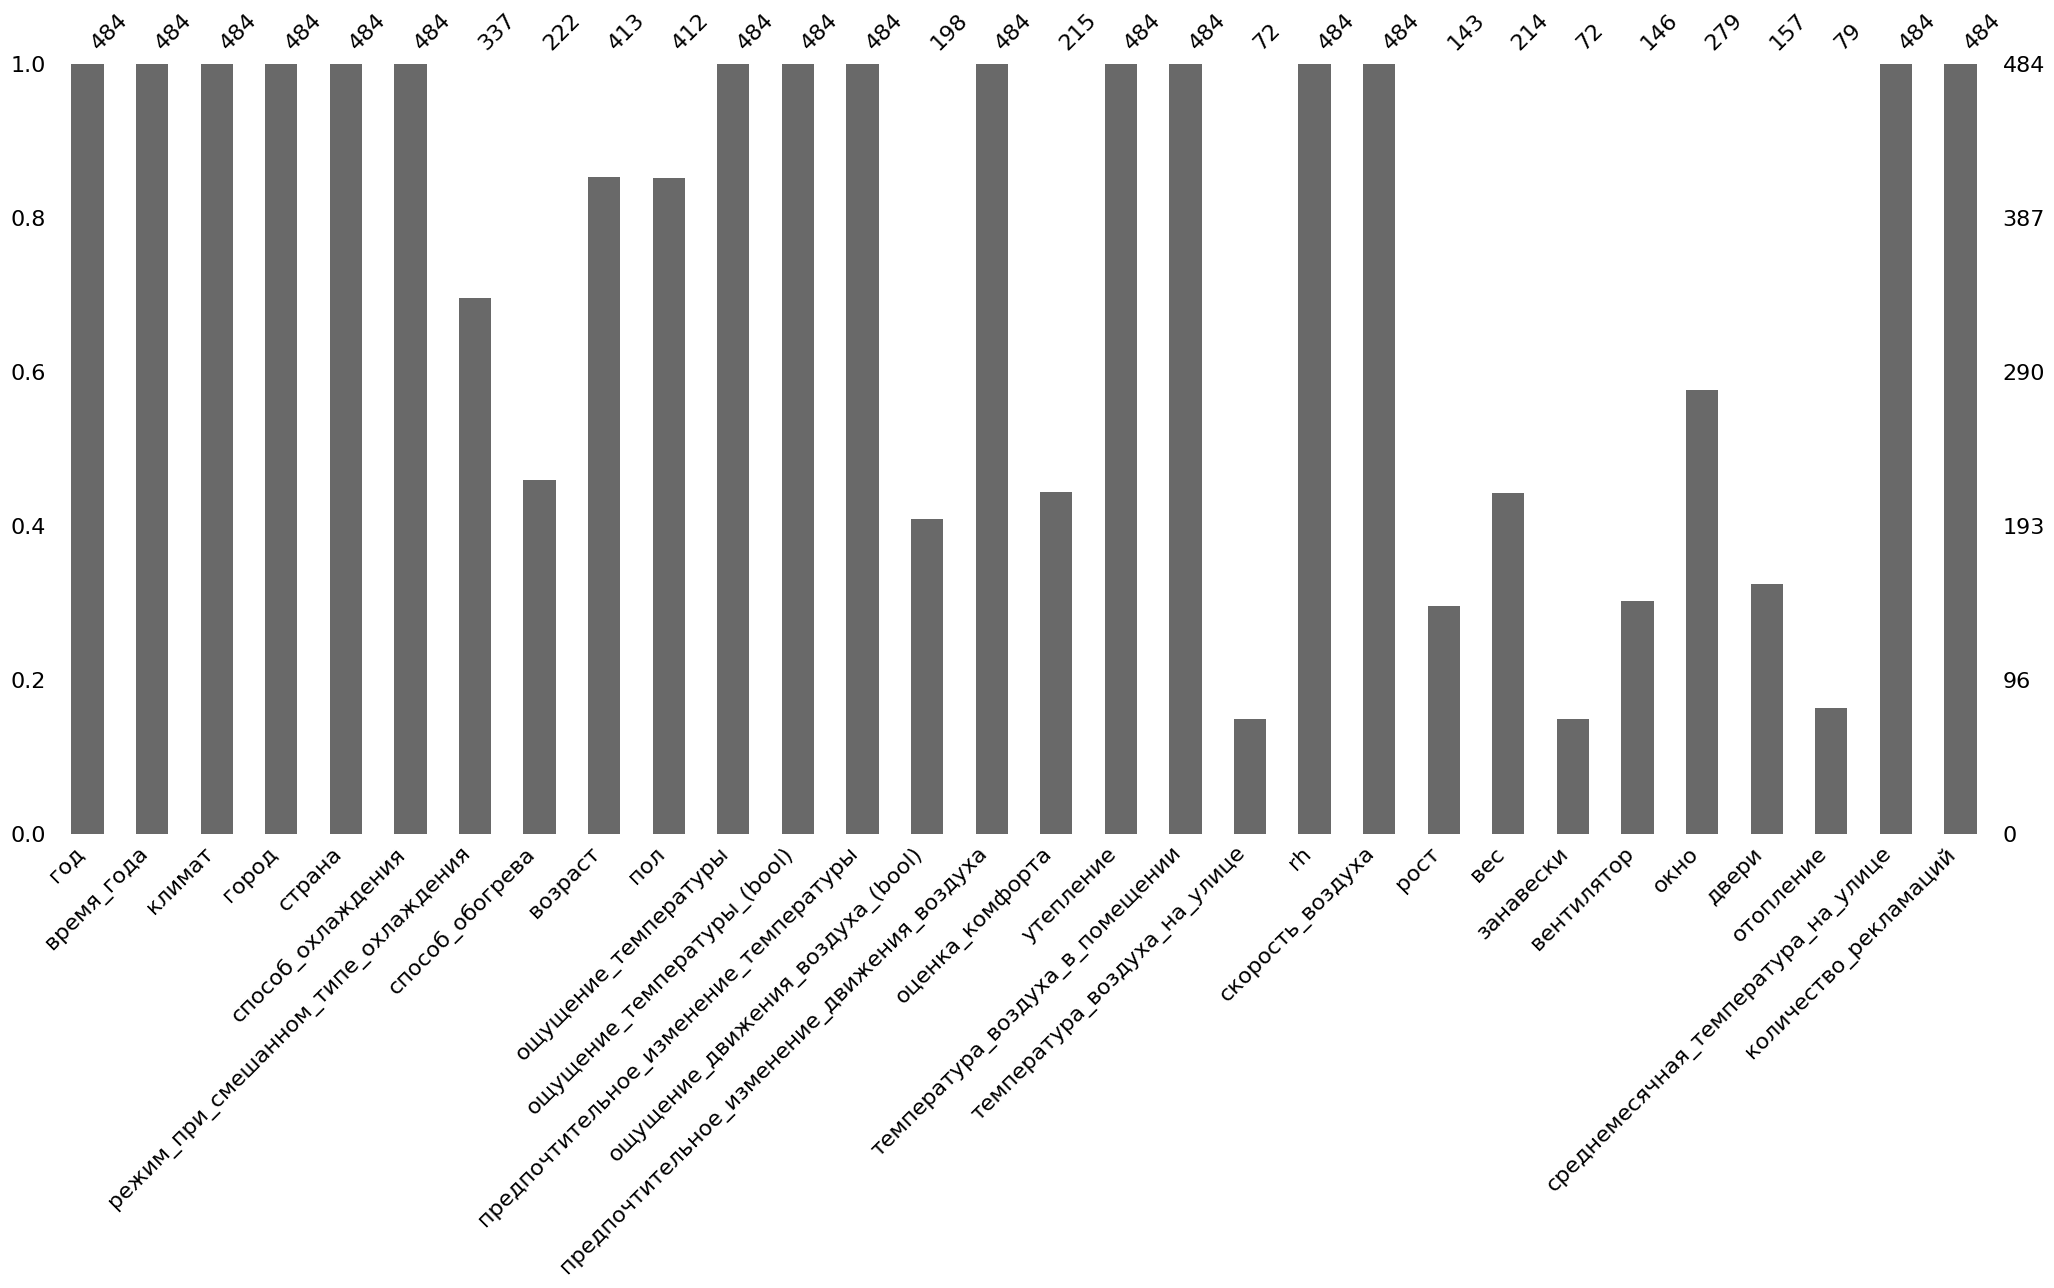

In [972]:
msno.bar(df)

Из пропусков:
*  Надо будет заполнить пропуски в факторе пол и возраст
*  Надо будет удалить факторы рост и вес респондента

In [973]:
deleted_data = 0

Переменная для счета процента удаленных данных

## Дубликаты

In [974]:
df[df.duplicated()]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
483,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


Видим, что существуют две одинаковых строки, можем удалить их, оставив первую строку, чтобы не было дубликатов.

In [975]:
deleted_data += (df.duplicated().sum() / df.shape[0]) * 100
df.drop_duplicates(keep='first', inplace=True)

Вообще дубликаты могут появиться из-за разных причин: ошибка во вводе данных в базу данных; возможно один и тот же человек выступает как респондент(его опросили несколько раз) и его ответы заносятся в базу данных несколько раз.

## Ошибки в факторах

In [976]:
def replace_mistakes(df, column_name, old, new):
    """Функция для заполнения ошибок в значениях категориального фактора"""
    mask = df[column_name] == old
    df.loc[mask, column_name] = new

In [977]:
print(df['климат'].value_counts(), '\n')
print(df['предпочтительное_изменение_температуры'].value_counts())

климат
Cубтропический океанический         269
Тропическая влажная саванна          77
Жаркий полузасушливый                68
Влажный субтропический муссонный     35
Субтропическое высокогорье           32
Cубтроп океанич                       1
Name: count, dtype: int64 

предпочтительное_изменение_температуры
Без изменений    288
Холоднее         132
Теплее            58
Холодн             2
Тепле              2
Name: count, dtype: int64


Можем наблюдать ошибки в столбцах климат и предпочтительное_изменение_температуры

In [978]:
replace_mistakes(df, column_name='климат', old='Cубтроп океанич', new='Cубтропический океанический')
replace_mistakes(df, 'предпочтительное_изменение_температуры', old='Холодн', new='Холоднее')
replace_mistakes(df, 'предпочтительное_изменение_температуры', old='Тепле', new='Теплее')

Заменили ошибки в категориальных столбцах(неявные дубликаты), давайте теперь посмотрим на пропуски

## Смена типа переменных

In [979]:
df['год'] = df['год'].astype('int64')
try:
    df['возраст'] = df['возраст'].astype('int64')
except Exception:
    print('Проведем смену типа переменных в факторе возраст после заполнения пропусков в факторах возраст')

Проведем смену типа переменных в факторе возраст после заполнения пропусков в факторах возраст


Видим, что ловится исключение, в этих факторах есть пропуски, поэтому будем после удаления пропусков менять их тип

In [980]:
for column_name in ['ощущение_температуры_(bool)', 'ощущение_движения_воздуха_(bool)', 'занавески',
                    'вентилятор', 'окно', 'двери', 'отопление', 'оценка_комфорта']:
    df[column_name] = df[column_name].astype('object')

Проходимся по всем булевым/двухуровневым факторам и меняем их тип на категориальный, так как они должны быть двухуровневыми категориальными факторами. Также меняем тип фактора оценка_комфорта на категориальный, так как это категориальный порядковый тип данных

## Графический и аналитический анализ данных

In [981]:
def get_numeric(df):
    """Функция находит и возвращает название количественных факторов датасета"""
    return df.select_dtypes(include=['float64', 'int64']).columns

def draw_categorical(df):
    """Функция для черчения графиков для всех категориальных и количественных дискретных(4 и менее уровня)
    факторов в таблице data.csv. Если в категориальном факторе больше 4 уникальных значений,
    рисуется столбчатый график, если меньше - круговая диаграмма."""
    columns = [column for column in df.columns if column not in get_numeric(df) or
               len(df[column].unique()) <= 4]
    f, ax = plt.subplots(5, 4, figsize=(20, 35))
    for i in range(len(columns)):
        x, y = i // 4, i % 4
        if len(df[columns[i]].unique()) <= 4:
            df[columns[i]].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[x, y])
            ax[x, y].set_ylabel('Доля значений')
        else:
            df[columns[i]].value_counts().plot(kind='bar', ax=ax[x, y])
            ax[x, y].set_ylabel('Количество значений')
        ax[x, y].set_xlabel(columns[i], fontsize=15)
        ax[x, y].set_title(f'График по распределению фактора\n{columns[i]}')
    plt.tight_layout()
    plt.show()

def draw_numerical(df):
    """Функция для черчения графиков для количественных факторов в таблице
    data.csv. Рисуются Ящики с усами и Гистограммы с плотностью распределения"""
    columns = [column for column in get_numeric(df) if len(df[column].unique()) > 4]
    f, ax = plt.subplots(5, 4, figsize=(20, 35))
    for i in range(len(columns)):
        x, y = i // 2, i % 2
        sns.histplot(data=df, x=columns[i], kde=True, ax=ax[x, 2 * y], color='skyblue', edgecolor='black')
        sns.boxplot(data=df, x=columns[i], ax=ax[x, 2 * y + 1], color='lightgreen')
        ax[x, 2 * y].set_ylabel('Распределение значений')
        ax[x, 2 * y + 1].set_ylabel('Распределение значений')
        ax[x, 2 * y].set_xlabel(columns[i], fontsize=15)
        ax[x, 2 * y + 1].set_xlabel(columns[i], fontsize=15)
        ax[x, 2 * y].set_title(f'График плотности распределения фактора\n{columns[i]}')
        ax[x, 2 * y + 1].set_title(f'Ящик с усами по распределению фактора\n{columns[i]}')
    plt.tight_layout()
    plt.show()

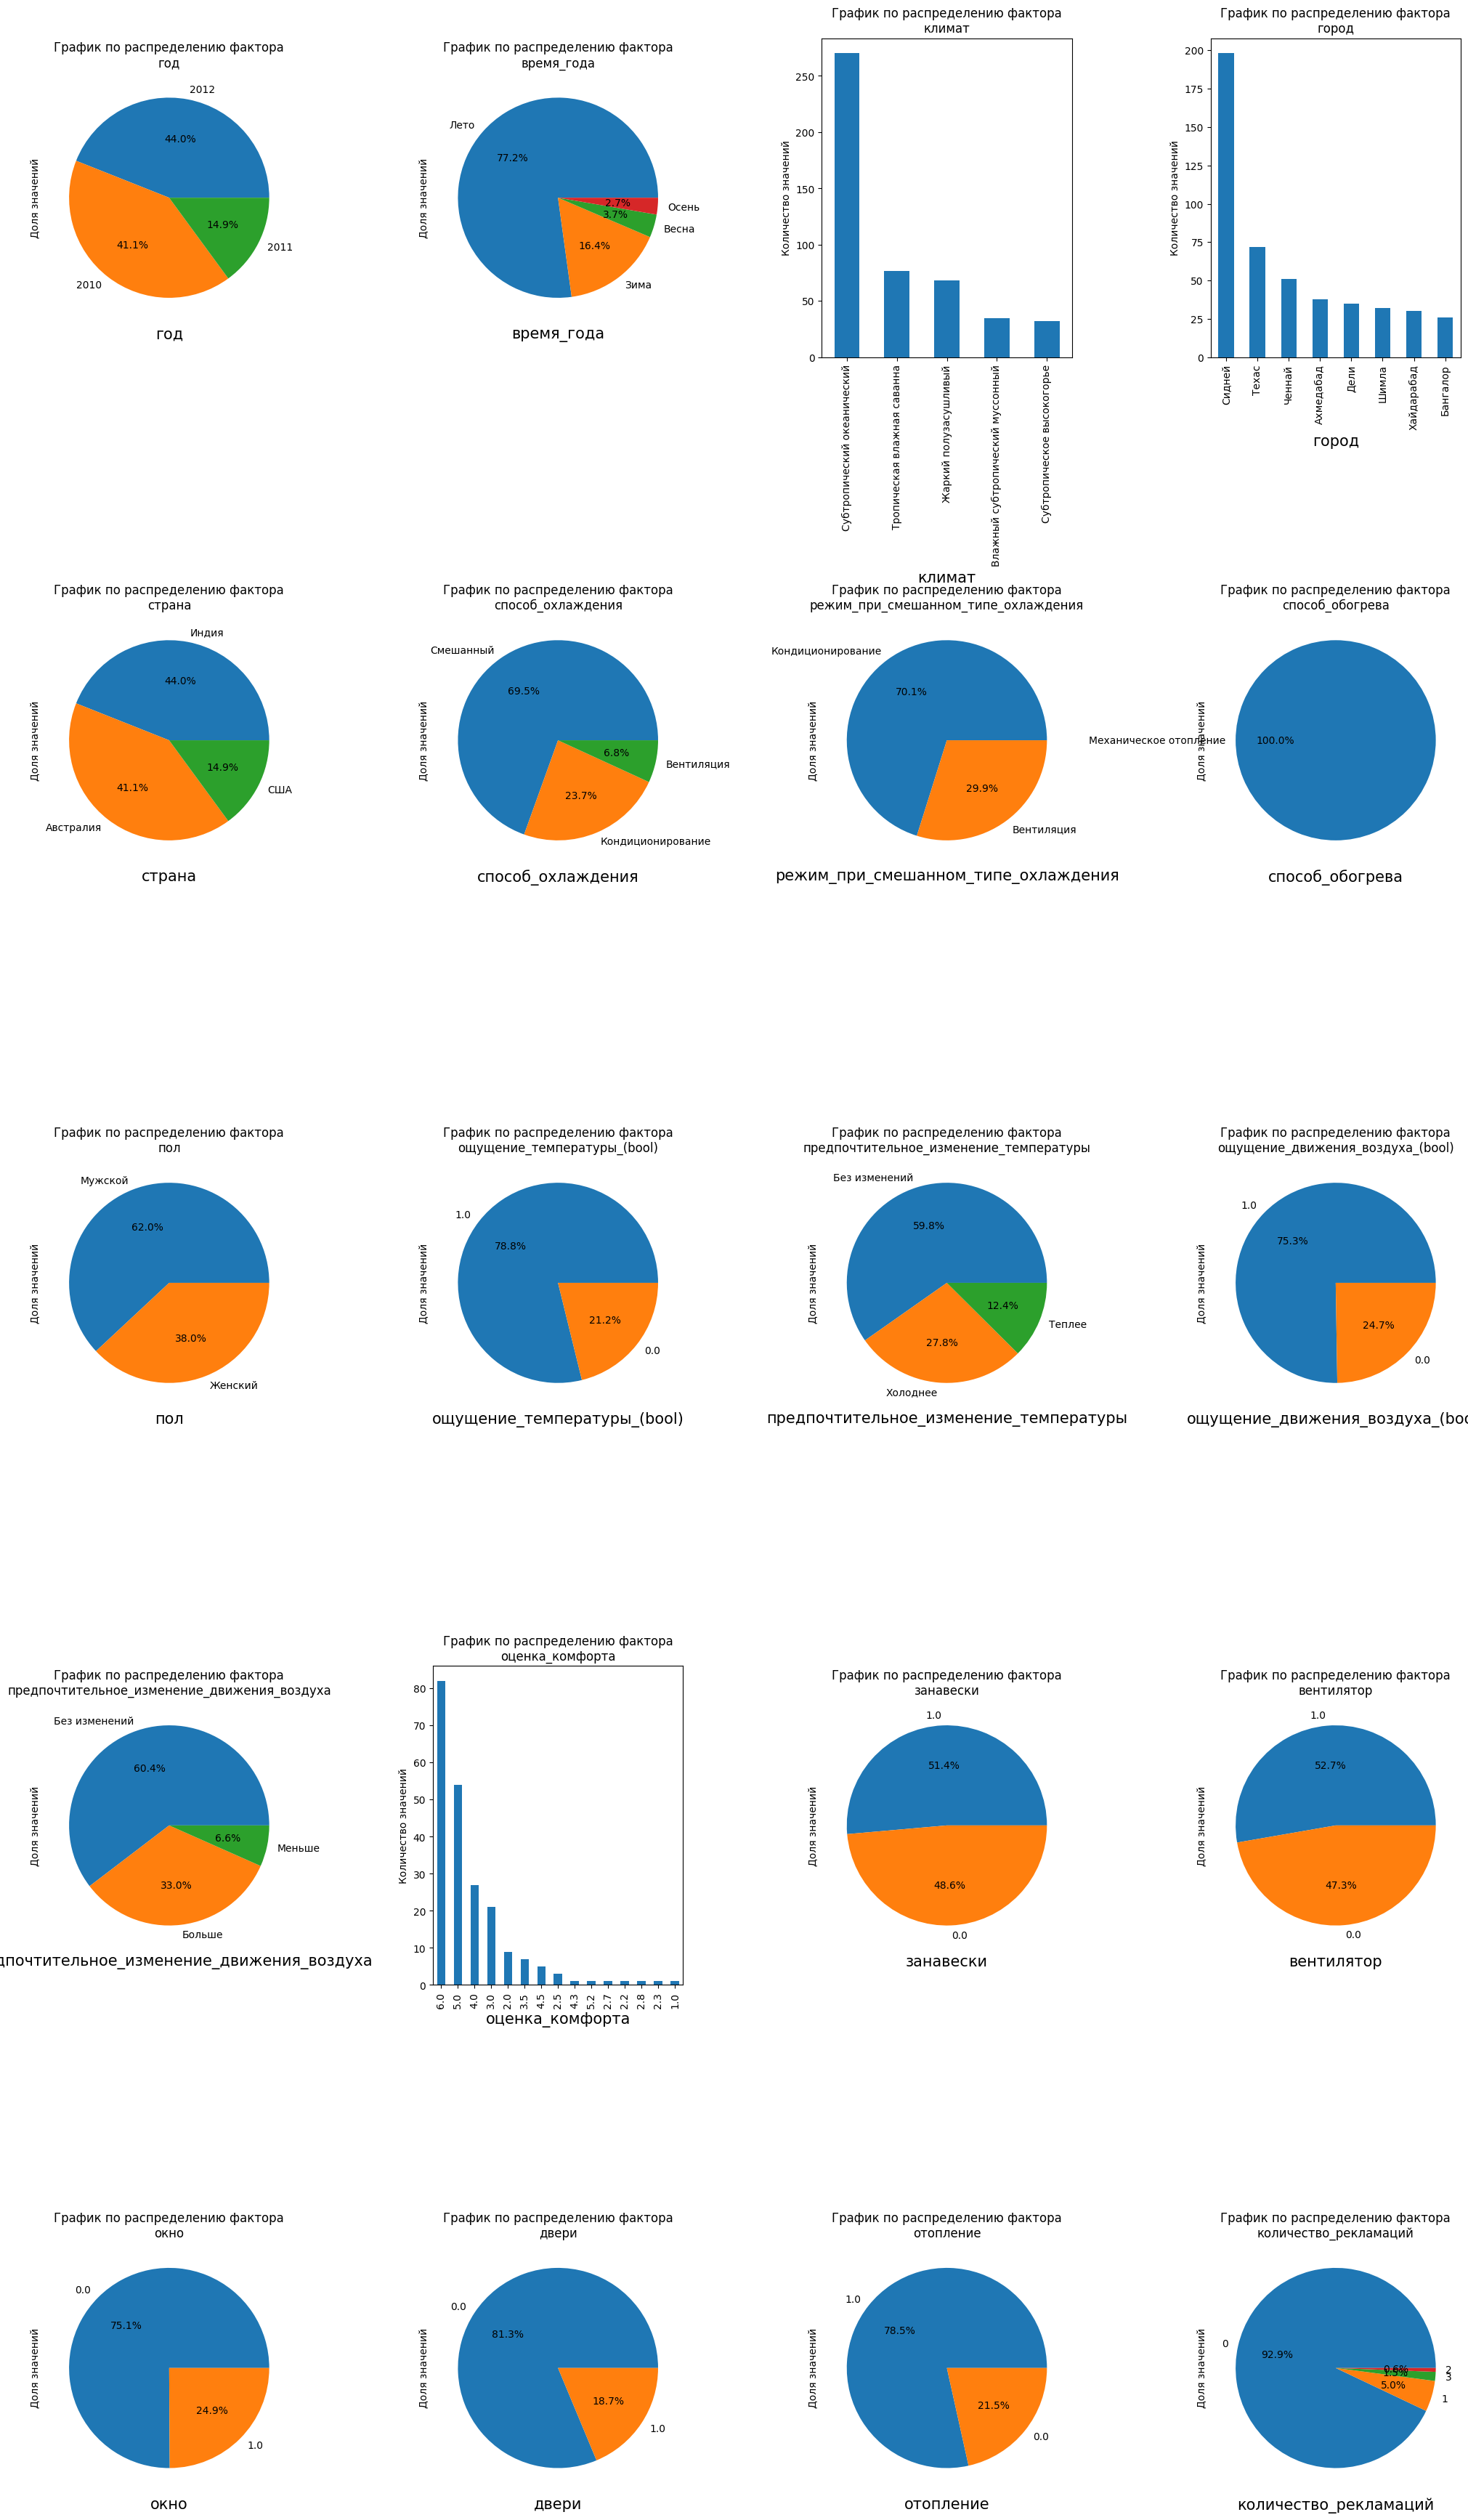

In [982]:
draw_categorical(df)

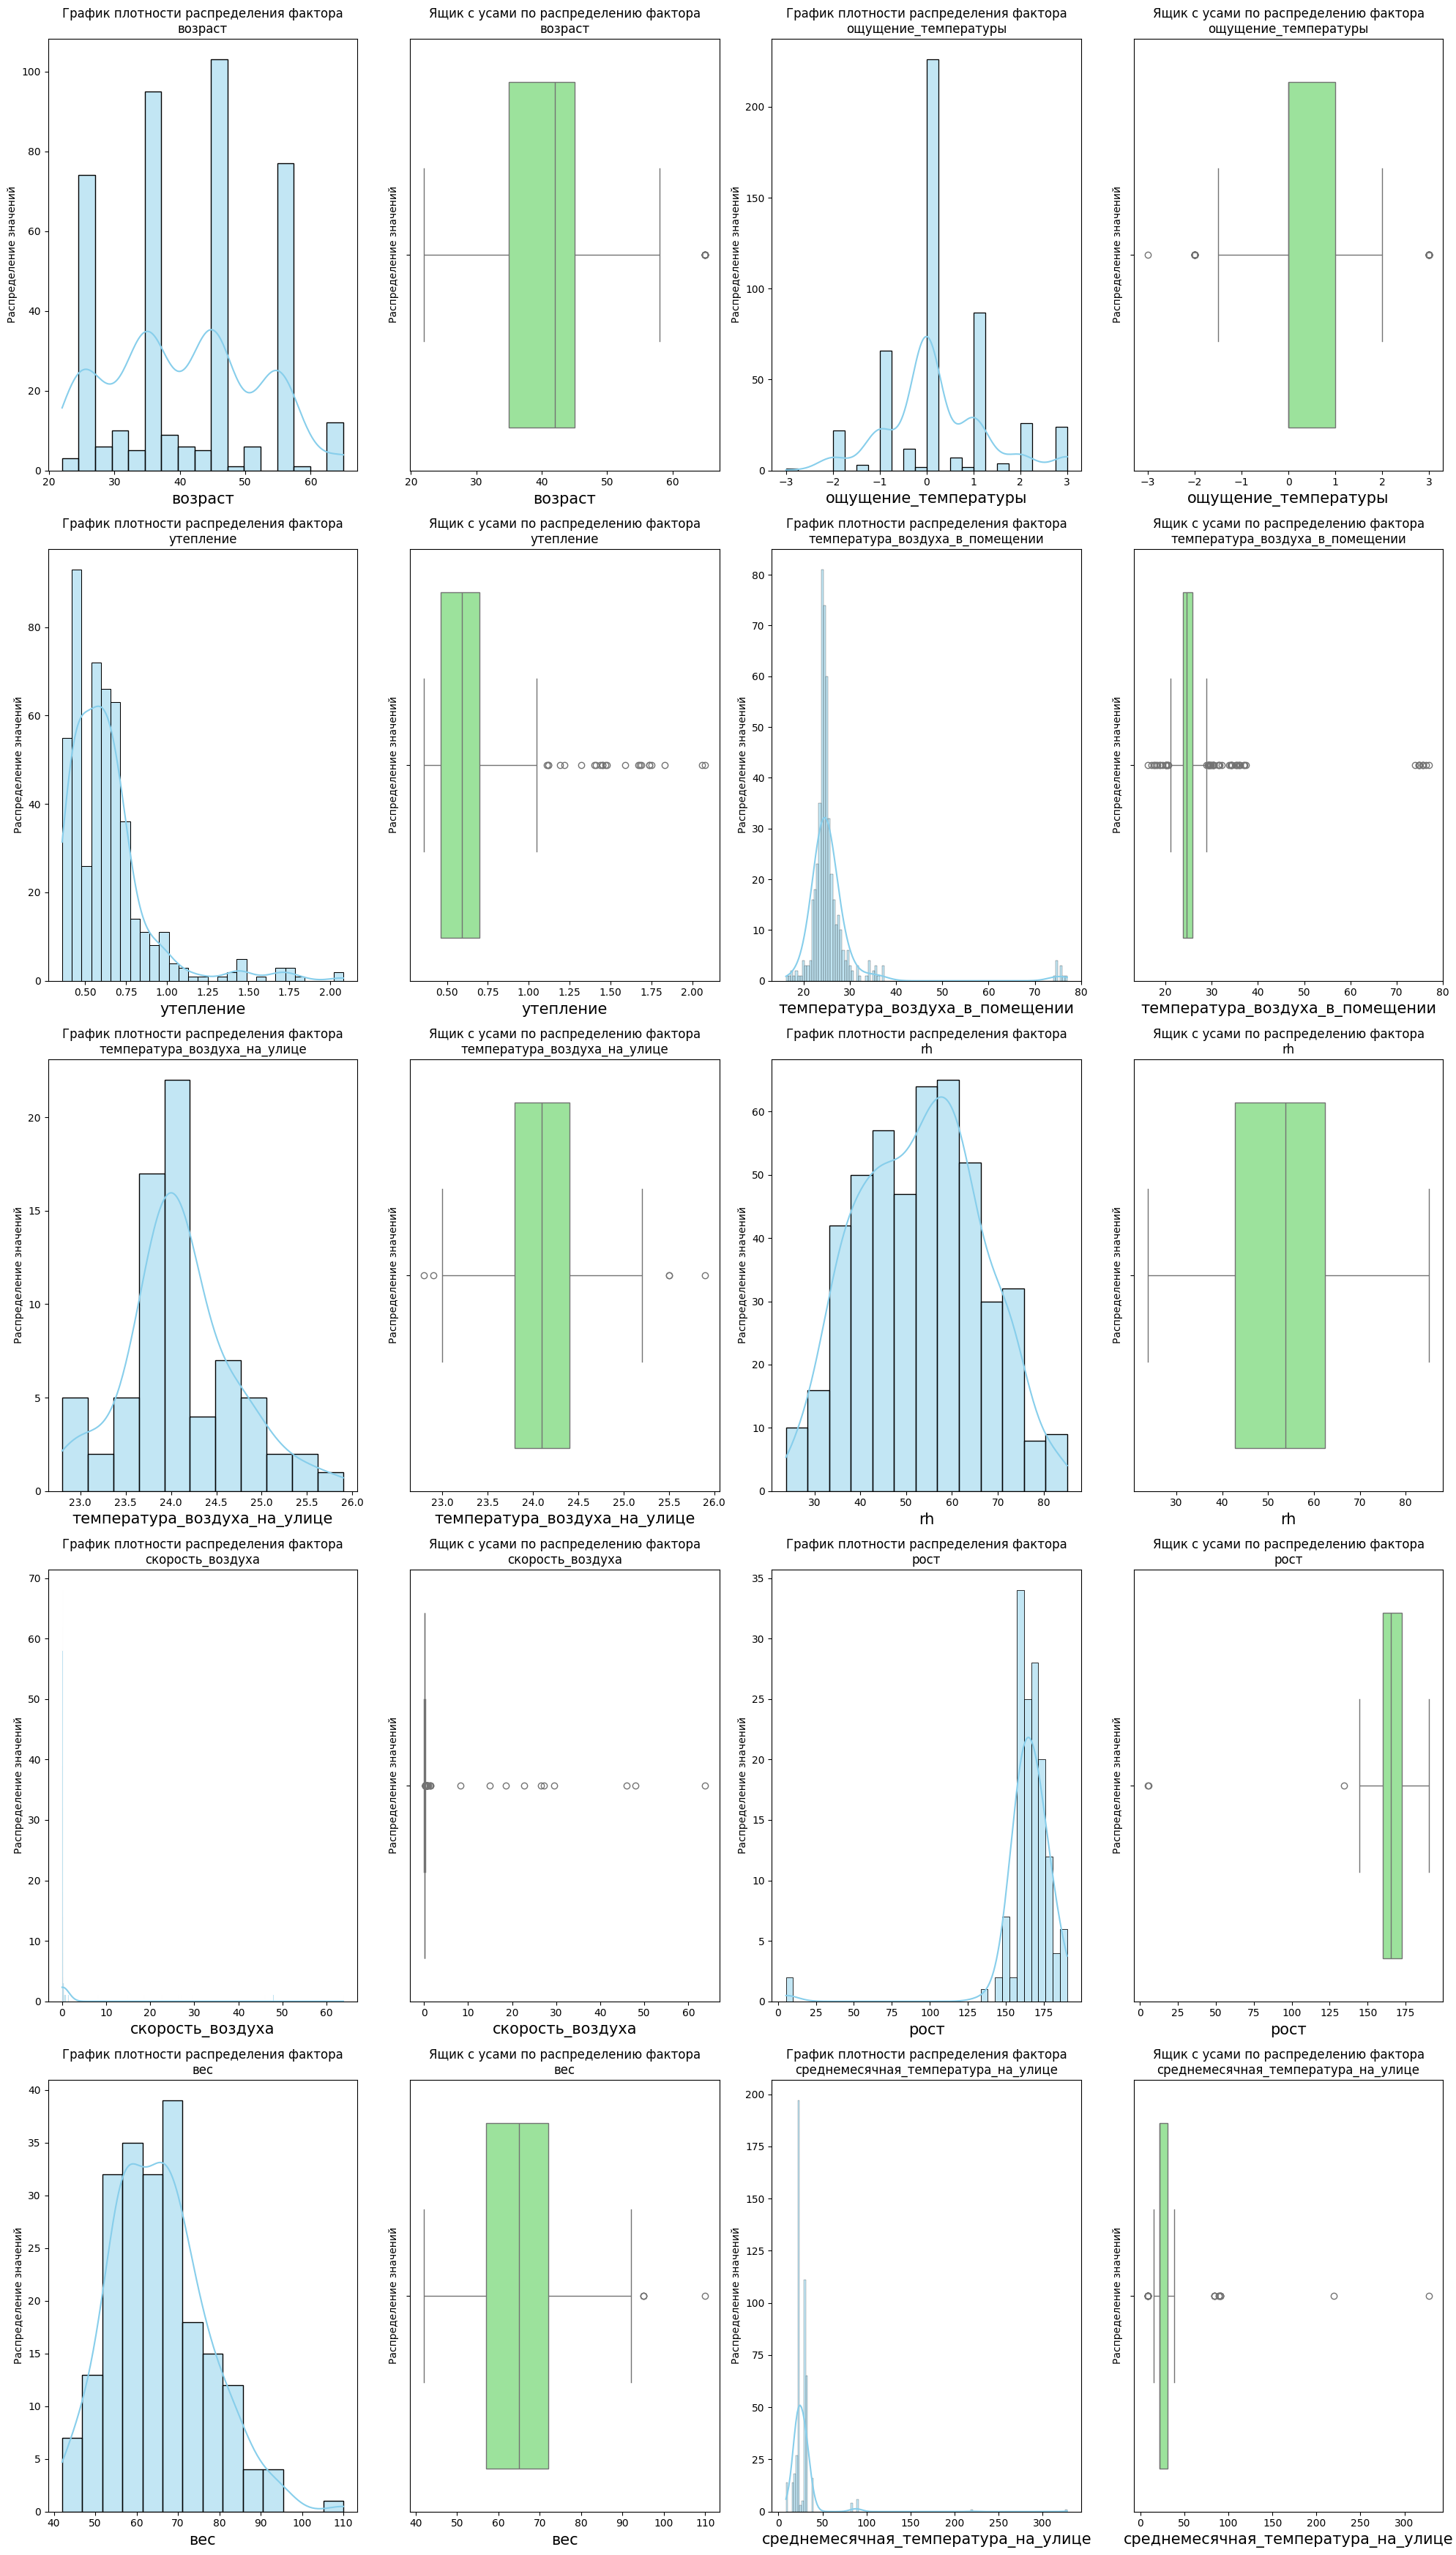

In [983]:
draw_numerical(df)

### Вывод по графикам
1.   Можем заметить, что бóльшая часть данных собиралась именно Летом.
2.   Самый часто встречающийся климат - Субтропический океанический.
3.   В общей сложности, смешанный тип охлаждения - самый распространенный вид охлаждения с отрывом(70%). Внутри смешанного типа охлаждения кондиционирование является более распространенным(70%), чем вентиляция(30%). По этой причине спешу утверждать, что кондиционирование в целом является самым распространенным типом охлаждения среди респондентов.
4.   У большинства респондентов, с которых получилось собрать информацию по окнам и дверям, были открыты окна и двери.


### Выбросы по графикам
1.   Есть подозрение на выброс в факторе возраст, но мы можем заметить, что их,во-первых, малых, во-вторых, они в пределах разумного(65 лет примерно). Вполне возможно, что среди респондентов оказался пожилой человек.
2.   В факторе утепление уже есть подозрения на супервыброс, но они не будут обработаны по ряду причин:
  * Мерзливость респондентов. Разные люди по-разному реагируют на жару или холод
  * Респондент не успел перейти с "теплой" куртки на "легкую". Возможно резкий перепад температур произошел за короткий срок, и респонденты пришли в жаркий день в теплой одежде
3.   В факторе температура воздуха в помещении существуют явные супервыбросы, возможно произошел сбой прибора, который измеряет температуру в помещении, так как внутри помещения 70-80 градусов не может быть. Скорее всего, эти измерения даны в Фаренгейтах, надо разбираться.
4.   В факторе скорость воздуха тоже есть существенные супервыбросы. Так как медианное значение возле 0, то могу утверждать, что скорость воздуха обозначает скорость ветра внутри помещения. Поэтому нам стоить удалить эти супервыбросы. Ветра 20+ м/с в помещении не может быть.
5.   В факторе среднемесячная температура на улице есть явные супервыбросы, там точно произошли сбои в приборах измерения, так как 100, 200, 300 градусов по цельсию не может быть на улице на нашей планете, возможно измерения в Кельвинах, но 310 градусов по кельвину - это 37 градусов по цельсию, а 100 и 200 градусов по кельвину - это -50, -150 градусов по цельсию. поэтому далее будут шаги по работе с выбросами.

## Выбросы

In [984]:
def median_by_group(df, group_name, column_name):
    """Функция для нахождения медианы по группам,
    возвращает словарь название группы: медиана по этой группе"""
    ans = {}
    if group_name == '':
        ans = df[column_name].median()
    else:
        for name in df[group_name].unique():
            ans[name] = df.loc[df[group_name] == name, column_name].median()
    return ans

def mode_by_group(df, group_name, column_name):
    """Функция для нахождения моды по группам,
    возвращает словарь название группы: медиана по этой группе"""
    ans = {}
    if group_name == '':
        ans = df[column_name].mode()
    else:
        for name in df[group_name].unique():
            mode_series = df.loc[df[group_name] == name, column_name].mode()
            ans[name] = mode_series.iloc[0] if not mode_series.empty else None
    return ans

def ejection(df, column_name):
    """Функция возвращает верхнюю и нижнюю границы для использования метода определения
    выбросов с помощью трех интерквартильных размахов"""
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    return {'lower': q1 - iqr * 3, 'upper': q3 + iqr * 3}


def replace_ejection_with_medians(df, group_name, column_name):
    """Функция для замены выбросов медианой по группам"""
    lower = ejection(df, column_name).get('lower')
    upper = ejection(df, column_name).get('upper')
    medians = median_by_group(df, group_name, column_name)
    if group_name == '':
        mask = (df[column_name] < lower) | (df[column_name] > upper)
        df.loc[mask, column_name] = medians
    else:
        for group_value in df[group_name].unique():
            mask = ((df[column_name] < lower) | (df[column_name] > upper)) & (df[group_name] == group_value)
            df.loc[mask, column_name] = medians[group_value]

In [985]:
for column in ['скорость_воздуха', 'температура_воздуха_на_улице', 'среднемесячная_температура_на_улице']:
    print(f'{column}:\tlower={round(ejection(df, column)["lower"], 2)}, '
          f'upper={round(ejection(df, column)["upper"], 2)}')
    if column == 'температура_воздуха_на_улице' or column == 'среднемесячная_температура_на_улице':
        replace_ejection_with_medians(df, 'город', column)
    else:
        replace_ejection_with_medians(df, 'способ_охлаждения', column)

скорость_воздуха:	lower=-0.14, upper=0.35
температура_воздуха_на_улице:	lower=22.0, upper=26.2
среднемесячная_температура_на_улице:	lower=-4.4, upper=57.2


Заменяем супервыброс в факторах температура на улице по группе город, так как этот фактор напрямую зависит от региона. Супервыбросы в факторе скорость воздуха и  заполняем по группе способ охлаждения, так как этот фактор напрямую зависит от климатического оборудования.

In [986]:
df.loc[df['температура_воздуха_в_помещении'] > ejection(df, 'температура_воздуха_в_помещении').get('upper'), 'температура_воздуха_в_помещении']

1      74.8
7      74.8
9      76.4
23     77.0
33     74.9
38     75.5
41     75.7
45     74.0
54     75.7
67     74.9
290    35.3
293    34.1
296    37.0
299    35.2
322    33.7
328    34.3
358    35.9
361    35.8
362    32.2
365    34.4
367    34.3
369    35.5
378    37.4
382    36.2
406    37.1
Name: температура_воздуха_в_помещении, dtype: float64

Можем увидеть, что действительные выбросы - это 70+ градусов, давайте дальше исследовать их.

In [987]:
df.loc[df['температура_воздуха_в_помещении'] > 70, 'страна'].value_counts()

страна
США    10
Name: count, dtype: int64

Видим, что эти выбросы возникают в стране США, поэтому, скорее всего, эти данные даны в фаренгейтах, давайте их переводить в цельсии

In [988]:
df.loc[df['температура_воздуха_в_помещении'] > 70, 'температура_воздуха_в_помещении'].map(lambda x: (x - 32) * 5/9)

1     23.777778
7     23.777778
9     24.666667
23    25.000000
33    23.833333
38    24.166667
41    24.277778
45    23.333333
54    24.277778
67    23.833333
Name: температура_воздуха_в_помещении, dtype: float64

Выбросы заменили переведенным в цельсии значения температуры

## Пропуски

In [989]:
def replace_empty(df, group_name, column_name):
    """Функция заполняет пропуски статистикой по группе:
    количественные - медианой по группе,
    категориальные - модой по группе"""
    if column_name in get_numeric(df):
      medians = median_by_group(df, group_name, column_name)
      for group_value in df[group_name].unique():
              df.loc[df[column_name].isna(), column_name] = medians[group_value]
    else:
      modes = mode_by_group(df, group_name, column_name)
      for group_value in df[group_name].unique():
              df.loc[df[column_name].isna(), column_name] = modes[group_value]

In [990]:
number_of_replaced = 0

In [991]:
print(df['возраст'].isna().sum())
print(df['пол'].isna().sum())

69
72


Видим пропуски в факторах возраст и пол. Можем заменить их с помощью статистик

In [992]:
number_of_replaced += df['возраст'].isna().sum()
number_of_replaced += df['пол'].isna().sum()
number_of_replaced

141

Количество пропусков, которые необходимо будет заменить

### Пропуски в возрасте

In [993]:
df.loc[df['возраст'].isna(), 'город'].value_counts()

город
Ченнай        39
Хайдарабад    30
Name: count, dtype: int64

Можем заметить, что все пропуски в факторе возраст находятся в двух городах Ченнай и Хайдарабад.

In [994]:
df.loc[df['город'] == 'Ченнай', 'возраст'].value_counts().sum()

12

В городе Ченнай есть информация о возрасте только у 12 человек из 51 - (23%).

In [995]:
df.loc[df['город'] == 'Хайдарабад', 'возраст'].value_counts().sum()

0

В городе Хайдарабад нет вообще информации о возрасте респондентов (0 из 30)

Давайте тогда строить модель линейной регрессии для определения возраста

In [996]:
def get_ohe(train, categ):
    """Функция для категоризации с помощью OneHotEncoder, возвращает датасет x_train с новыми факторами, которые категоризировались"""
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data

In [997]:
age_df = df.dropna(subset=['возраст'])

X = age_df[['утепление', 'температура_воздуха_в_помещении', 'ощущение_температуры']]
y = age_df['возраст']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

missing_age_indices = df[df['возраст'].isnull()].index
predicted_ages = model.predict(df.loc[missing_age_indices, ['утепление', 'температура_воздуха_в_помещении', 'ощущение_температуры']]).astype(int)

print(predicted_ages[:10])

[41 40 40 40 40 41 40 41 41 40]


Построили модель линейной регрессии по фичам утепление респондента, температура воздуха в помещении и ощущение температуры, так как по этим факторам можно скорее определить возраст человека: как он тепло одевает, как он ощущает температуру в помещении. Эти факторы отличаются от возраста человека, чем старее человек, тем он более мерзливый.

In [998]:
df.loc[missing_age_indices, 'возраст'] = predicted_ages

Заполняем пропуски в факторе возраст предсказанной величиной благодаря модели линейной регрессии.

In [999]:
df['возраст'] = df['возраст'].astype('int64')
df['год'] = df['год'].astype('int64')

### Пропуски в факторе "пол"

In [1000]:
df.loc[df['пол'].isna(), 'город'].value_counts()

город
Техас    72
Name: count, dtype: int64

Видим, что все пропуски в факторе пол сосредоточены в городе Техас

In [1001]:
df.loc[df['город'] == 'Техас', 'пол'].value_counts().sum()

0

В городе Техас вообще в целом нет информации по полу, поэтому давайте смотрить в целом на США

In [1002]:
df.loc[df['страна'] == "США", 'пол'].value_counts()

Series([], Name: count, dtype: int64)

И в целом в США нет информации по полу. Это возможно обусловлено тем, что с нынешними трендами, в развитых странах все сложно с полом, особенно со сбором информации про пол. Поэтому предлагаю заполнить пол значением non-binary

In [1003]:
df['пол'].fillna('non-binary', inplace=True)

### Пропуски в факторе температура на улице

In [1004]:
number_of_replaced += df['температура_воздуха_на_улице'].isna().sum()
df.loc[df['температура_воздуха_на_улице'].isna(), 'температура_воздуха_на_улице'] = df['среднемесячная_температура_на_улице']

Заполняем пропуски в факторе температура воздуха на улице фактором среднемесячная температура на улице

### Удаление факторов рост и вес

In [1005]:
print(f'Процент заполненных значений в факторе рост = {round((1 - df["рост"].isna().mean()) * 100, 1)}%\n'
      f'Процент заполненных значений в факторе вес = {round((1 - df["вес"].isna().mean()) * 100, 1)}%')

Процент заполненных значений в факторе рост = 29.7%
Процент заполненных значений в факторе вес = 44.0%


In [1006]:
deleted_data += (2 * df.shape[0] - df.isna().sum()[['рост', 'вес']].sum()) / (
            df.shape[0] * df.shape[1] - df.isna().sum().sum() + df.isna().sum()[['рост', 'вес']].sum()) * 100

Добавляем в процентаже сколько непустых значений в факторах рост и вес удалилось

In [1007]:
df.drop(['рост', 'вес'], axis=1, inplace=True)

Мы удаляем факторы рост и вес, так как они не имеют весомой значимости для построения "портрета" респондента, так как в ощущении холода такие факторы, как рост и вес не такие значительные, как возраст и пол. Тем более, в графике пропусков можем заметить, что количество данных очень мало, не превышает даже 50%.

### Конечный график

<Axes: >

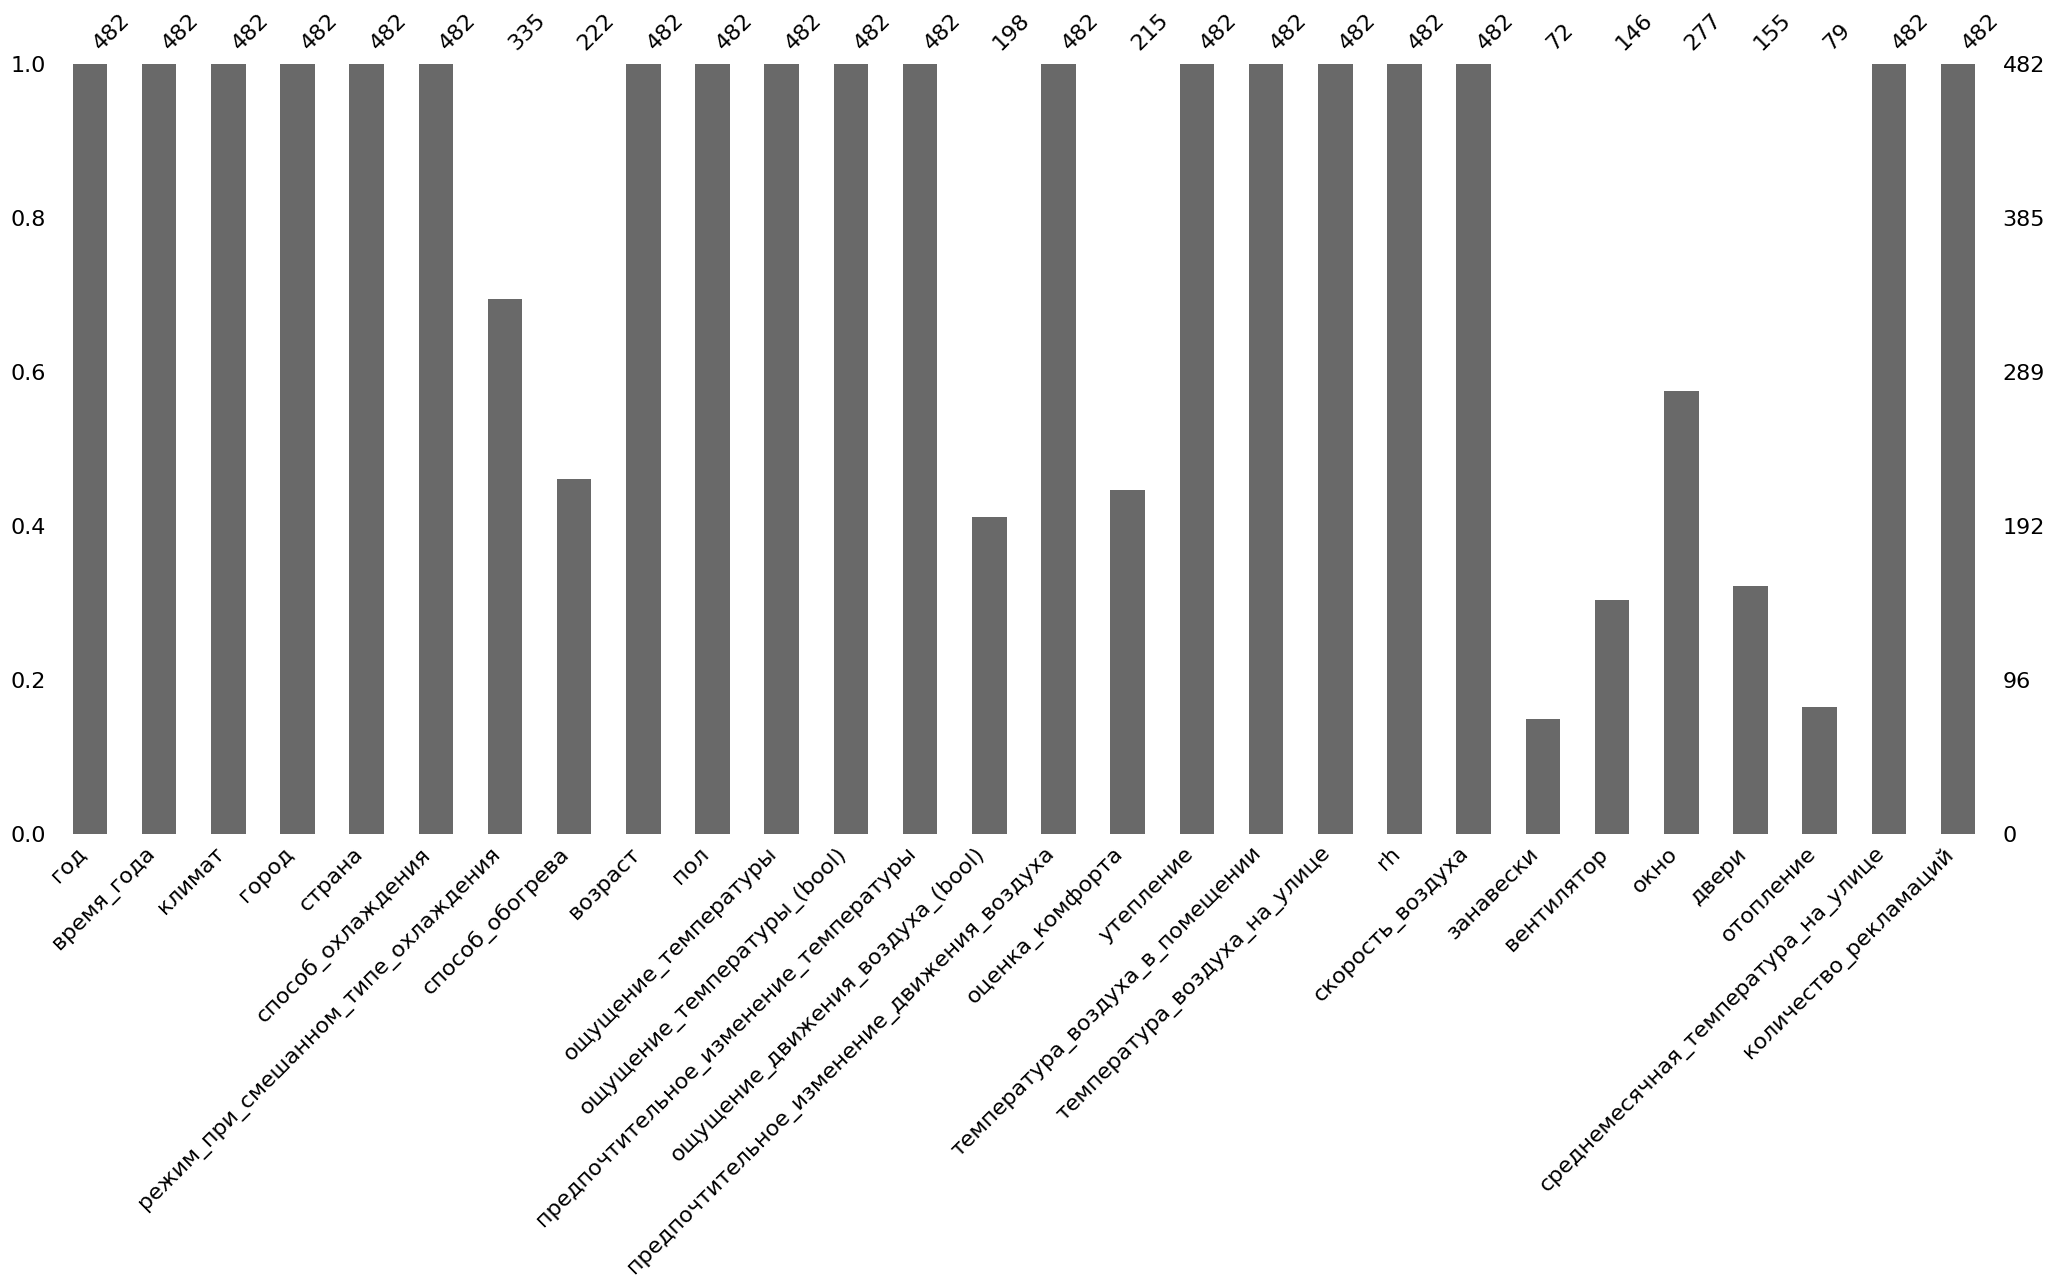

In [1008]:
msno.bar(df)

Можем увидеть, что пропуски в факторах возраст, пол действительно заполнились, а остальные факторы остались без изменений.

## Вывод по предобработке

In [1009]:
print(f'Было {previous_shape[0]} строк, стало {df.shape[0]} строки.\n'
f'Было {previous_shape[1]} факторов, стало {df.shape[1]} факторов.\n'
f'Заполнили {round(number_of_replaced / (df.shape[0] * df.shape[1]) * 100, 1)}%({number_of_replaced}) пропусков.\n'
f'Удалили такие факторы как: рост, вес\n'
f'Было удалено {round(deleted_data, 1)}% значений из исходных данных'
)


Было 484 строк, стало 482 строки.
Было 30 факторов, стало 28 факторов.
Заполнили 4.1%(551) пропусков.
Удалили такие факторы как: рост, вес
Было удалено 3.4% значений из исходных данных


In [1010]:
def if_normal(df, column_name):
    """Функции для проверки на нормальность распределения данных по методу
    shapiro и с доверительным интервалом 0.05"""
    statistic, p_value = shapiro(df[column_name])
    if p_value < 0.05:
        return False
    else:
        return True

def make_normality_dict(df):
    """Функция make_normality_dict возвращает словарь, где ключ - название количественного фактора,
    значение True/False:Нормально/Ненормально распределены данные в количественном факторе"""
    normality_dict = {}
    for column_name in get_numeric(df):
        normality_dict[column_name] = if_normal(df=df, column_name=column_name)
    return normality_dict

In [1011]:
normality_dict = make_normality_dict(df)
normality_dict

{'год': False,
 'возраст': False,
 'ощущение_температуры': False,
 'утепление': False,
 'температура_воздуха_в_помещении': False,
 'температура_воздуха_на_улице': False,
 'rh': False,
 'скорость_воздуха': False,
 'среднемесячная_температура_на_улице': False,
 'количество_рекламаций': False}

### Вывод по нормальности распределения данных
* Все количественные факторы распределены ненормально

# 2. Расчеты и исследования

Давайте посмотрим выброс в возрасте (65 лет) и разбираться, почему так.

In [1012]:
df[df['возраст'] > 60].groupby('город')['способ_охлаждения'].value_counts()

город      способ_охлаждения
Ахмедабад  Вентиляция            1
Сидней     Смешанный            11
Name: count, dtype: int64

По статистике из сайта https://shorturl.at/cF018, пенсионный возраст в Австралии - 65 лет. Поэтому, скорее всего, есть такие работники в офисах.
А вот в Индии пенсионный возраст - 60 лет. Возможно, в тот день пришел либо начальник офиса, либо чей то дядя/отец пришел в офис и у него собрали информацию насчет ощущений в тот день.
___

Давайте исследовать, у какой части респондентов были жалобы на оборудование, на какое именно оборудование были жалобы и почему?

In [1013]:
complains = df.loc[df['количество_рекламаций'] > 0]
complains.groupby(['способ_охлаждения', 'город'])[['количество_рекламаций']].sum()

количество_рекламаций
способ_охлаждения город                           
Кондиционирование Бангалор                       1
                  Дели                           4
                  Техас                         27
Смешанный         Ахмедабад                     10
                  Дели                           3
                  Сидней                         6

Видим, что в общем жалоб на оборудование вентиляция не было, значит, что вентиляция - самый надежный способ охлаждения из всех. В то же время на кондиционирование пришло больше всех жалоб, особенно в Техасе(27). В сумме жалоб на кондиционирование 32. На смешанный тип охлаждения 19, 10 из которых были из Ахмедабада.
___
В общем на кондиционирование в Техасе, на смешанный способ в Ахмедабаде приходят больше всего жалоб.

In [1014]:
complains.loc[complains['город'] == 'Ахмедабад', ['скорость_воздуха', 'температура_воздуха_в_помещении', 'rh', 'ощущение_температуры', 'температура_воздуха_на_улице']]

,скорость_воздуха,температура_воздуха_в_помещении,rh,ощущение_температуры,температура_воздуха_на_улице
273,0.10,27.5,44.6,1.0,29.5
295,0.17,25.4,46.2,0.0,29.5
313,0.08,25.6,48.0,0.0,29.5
341,0.10,24.0,59.4,-0.5,29.5
365,0.22,34.4,44.5,2.0,29.5
404,0.09,30.3,69.8,0.0,29.5


Можем увидеть, что жалобы хаотичные, но есть одна, бросающаяся в глаза, деталь, иногда проглядывается заоблачная температура и относительная влажность, возможно выходят из строя регуляторы.

In [1015]:
complains.loc[complains['город'] == 'Техас', ['скорость_воздуха', 'температура_воздуха_в_помещении', 'rh', 'ощущение_температуры', 'температура_воздуха_на_улице']]

,скорость_воздуха,температура_воздуха_в_помещении,rh,ощущение_температуры,температура_воздуха_на_улице
3,0.13,24.2,50.0,-0.5,23.8
13,0.13,26.4,31.7,0.5,25.5
14,0.13,23.2,45.2,-1.5,23.0
18,0.32,23.8,43.8,-2.0,24.2
19,0.14,24.5,34.4,2.0,24.0
21,0.10,25.8,34.5,1.5,24.9
23,0.07,77.0,33.3,1.6,24.7
24,0.19,23.8,39.4,0.0,23.8
27,0.07,25.1,34.2,-0.2,24.2
28,0.13,23.9,40.4,-0.5,24.6


Можем увидеть, что у некоторых респондентов ощущение температуры 2(жарко), хотя температура в помещении в норме. Это скорее из-за низкой относительной влажности, которую производят кондиционеры. Были также жалобы на слишком сильный холод, ощущение температуры -2, это обусловлено тем, что скорость воздуха выше, чем обычно. Значит, иногда выходит из под контроля скорость потока воздуха. Также можем заметить, что в Техасе температура на улице была в целом комфортной даже для офисного помещения. При температурах в офисе выше уличной - жаловались на жару, ниже уличной - жаловались на холод.

In [1016]:
df['кат_рекламаций'] = df['количество_рекламаций'].apply(lambda x: 'мало' if x <= 1 else ('средне' if 1 < x <= 2 else 'много'))

Создал дополнительный категориальный столбец, который покажет количество рекламаций по каждому респонденту отдельно: мало, если меньше равно 1, средне, если между 1 и 2, много, если больше 2.

In [1017]:
df.groupby(['страна', 'пол'])['возраст'].mean().astype('int64')

страна     пол       
Австралия  Женский       46
           Мужской       42
Индия      Женский       37
           Мужской       39
США        non-binary    36
Name: возраст, dtype: int64

Сгруппировал по двум критериям "страна" и "пол" и нашел среднюю возраста по стране. Можем заметить, что в США не было респондентов женского пола, а в австралии респонденты были в среднем старше на 6-10 лет респондентов из Индии.

In [1018]:
df['возрастная_группа'] = df['возраст'].apply(lambda x: 'молодой возраст' if x <= 44 else ('средний возраст' if 45 <= x <= 59 else 'пожилой возраст'))

Создал новый категориальный столбец возрастная группа, по столбцу возраст, чтобы в дальнейшем можно было работать с категориями респондентов по возрасту.

In [1019]:
satisfied_df = df[(df['ощущение_температуры'] >= -0.1) & (df['ощущение_температуры'] <= 0.1)]
satisfied_df.groupby(['возрастная_группа'])['температура_воздуха_в_помещении'].mean().apply(lambda x: round(x, 2)).reindex(['молодой возраст', 'средний возраст', 'пожилой возраст'])

возрастная_группа
молодой возраст    25.36
средний возраст    24.06
пожилой возраст    24.93
Name: температура_воздуха_в_помещении, dtype: float64

Сгруппировал и посчитал среднюю комфортную температуру среди возрастной категории. Оценку комфортности взял по шкале ощущение температуры -0.1 -- 0.1 по шкале от -3 до 3. Можем заметить, что для молодого и пожилого возраста комфортной температурой является промежуток 24.8-25 градусов, а для респонднетов среднего возраста комфортной температурой является ~24 градуса.

In [1020]:
df.groupby('способ_охлаждения')[['температура_воздуха_в_помещении', 'rh']].median()

,температура_воздуха_в_помещении,rh
способ_охлаждения,,
Вентиляция,25.3,46.30
Кондиционирование,24.4,42.45
Смешанный,24.6,56.50


Сгруппировал и посчитал медианное значение относительной влажности и температуры в помещении при разных типах охлаждения: вентиляция, кондиционирование и смешанный тип. Оказалось, что самое низкое значение температуры было зафиксировано при кондиционировании, но был самый низкий уровень относительной влажности. При смешанном типе температура в помещении почти такая же, но относительная влажность на 14% больше, что очень много. При вентиляции температура на 1 градус больше, чем при кондиционировании, и на 4% больше влажность. То есть спешу утверждать, что смешанный тип является самым оптимальным из способов охлаждения, так как имеет почти самую низкую температуру в помещении и близок к значению 50% относительной влажности - золотая середина.

In [1021]:
satisfied_grouped = satisfied_df.groupby(['страна', 'пол'])['температура_воздуха_в_помещении'].count()
all_grouped = df.groupby(['страна', 'пол'])['температура_воздуха_в_помещении'].count()
percentage_grouped = (satisfied_grouped / all_grouped).apply(lambda x: x * 100).round(2).fillna(0)
percentage_grouped = percentage_grouped.rename('процент_удовлетворенности')
percentage_grouped

страна     пол       
Австралия  Женский       44.94
           Мужской       56.88
Индия      Женский       41.79
           Мужской       53.10
США        non-binary    26.39
Name: процент_удовлетворенности, dtype: float64

Находим процентаж удовлетворенности (ощущение температуры -0.1 -- 0.1 по шкале от -3 до 3) респондентов по стране и полу. Оказалось, что в США очень маленький процент удовлетворенных комфортом респондентов. В Индии мужчины более удовлетворены комфортом, чем женщины.

In [1022]:
df = df.merge(percentage_grouped, on=['страна', 'пол'], how='left')

Дальше добавляем столбец по этому группированному датасету

In [1023]:
df[['страна', 'пол', 'процент_удовлетворенности']].tail(5)

,страна,пол,процент_удовлетворенности
477,Индия,Мужской,53.10
478,Индия,Мужской,53.10
479,Индия,Мужской,53.10
480,Индия,Мужской,53.10
481,Индия,Женский,41.79


Добавил столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов по столбцам "страна" и "пол"

In [1024]:
pivot_table = pd.pivot_table(df, index=['страна', 'пол', 'возрастная_группа'], values=['температура_воздуха_в_помещении', 'среднемесячная_температура_на_улице', 'rh'], aggfunc='mean').apply(lambda x: round(x, 2))
pivot_table

rh  \
страна    пол        возрастная_группа          
Австралия Женский    молодой возраст    61.37   
                     пожилой возраст    44.55   
                     средний возраст    61.27   
          Мужской    молодой возраст    61.67   
                     пожилой возраст    64.37   
                     средний возраст    61.68   
Индия     Женский    молодой возраст    49.89   
                     средний возраст    49.94   
          Мужской    молодой возраст    49.54   
                     пожилой возраст    78.80   
                     средний возраст    52.76   
США       non-binary молодой возраст    38.99   
                     средний возраст    38.81   

                                        среднемесячная_температура_на_улице  \
страна    пол        возрастная_группа                                        
Австралия Женский    молодой возраст                                  22.00   
                     пожилой возраст                                  22.00   
                     средний возраст                                  22.00   
          Мужской    молодой возраст                                  22.00   
                     пожилой возраст                                  22.00   
                     средний возраст                                  22.00   
Индия     Женский    молодой возраст                                  27.99   
                     средний возраст                                  21.83   
          Мужской    молодой возраст                                  27.45   
                     пожилой возраст                                  29.50   
                     средний возраст                                  22.81   
США       non-binary молодой возраст                                  31.28   
                     средний возраст                                  30.34   

                                        температура_воздуха_в_помещении  
страна    пол        возрастная_группа                                   
Австралия Женский    молодой возраст                              23.84  
                     пожилой возраст                              24.90  
                     средний возраст                              24.11  
          Мужской    молодой возраст                              24.15  
                     пожилой возраст                              24.73  
                     средний возраст                              24.04  
Индия     Женский    молодой возраст                              26.67  
                     средний возраст                              24.23  
          Мужской    молодой возраст                              25.98  
                     пожилой возраст                              29.30  
                     средний возраст                              26.19  
США       non-binary молодой возраст                              31.96  
                     средний возраст                              28.72

Создал сводную таблицу по стране, полу и возрастной группе используя значения относительной влажности, среднемесячной температуры на улице и температуры в помещении


1.  Можем заметить, что во всей Австралии была одинаковая температура на улице среди всех респондентов, скорее всего всех опросили в течение одного месяца. У двух полов и у всех возрастных групп, кроме пожилых женщин(45%),показатель относительной влажности был на уровне 60%, что достаточно много. Температура воздуха в помещении была в районе нормы, 24-25С
2.  В Индии относительная влажность у двух полов и у всех возрастных групп, кроме пожилых мужчин(78.8%, это слишком много, возможно сбой произошел), была на очень хорошем уровне, ~50%, это очень хороший показатель. То же самое можно сказать про температуру в помещении, она держалась в норме, но опять у пожилых мужчин плохой показатель: 29.3 градуса. Также в том месяце средняя температура на улице была в районе 29 градусов, что говорит нам о том, что плохо работало охлаждение.
3. В США был очень низкий показатель относительной влажности, но очень хорошо работало охлаждение: поддерживалась нормальная температура ~24 градуса при температуре на улице 30-31 градус.



In [1025]:
mask = (df['rh'] >= 40) & (df['rh'] <= 60)
df['стандарт_влажности'] = df['rh'].apply(lambda x: 'мало' if x < 40 else ('хорошо' if 40 <= x <= 60 else 'много'))
df['стандарт_влажности'].value_counts(normalize=True)

стандарт_влажности
хорошо    0.502075
много     0.309129
мало      0.188797
Name: proportion, dtype: float64

Добавил трехуровневый категориальный столбец стандарт_влажности у которого три значения: идеально(соответствует стандарту влажности), мало и много(не соответствует стандарту влажности). По источнику https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko стандарт относительной влажности в офисе или других рабочих помещениях 40-60%.

Можем сделать вывод, что примерно поровну относительная влажность соответствует стандарту и нет, что достаточно плохой показатель.

# 3. Корреляционный анализ

In [1026]:
def all_correlations(df):
    """
    Функция для нахождения корелляции между всеми парами факторов вида 1.количественная-количественная и 2.категориальная-категориальная;
    Используем функцию spearmanr для первого типа пар, так как в расчетах и исследованиях мы поняли, что все количественные факторы распределены ненормально;
    Используем функцию chi2_contingency для нахождения хи квадрат, затем используем коэффициент Cramer's V для нахождения корреляции.
    Возвращает словарь (фактор1, фактор2): (корреляция, p_value, тип корреляции). Причем корреляция округляется до 2 знака после запятой, p_value до 4 знака после запятой.
    """
    ans = {}
    columns = df.columns
    numeric = get_numeric(df)
    pairs = []
    for i in range(len(columns) - 1):
        for j in range(i + 1, len(columns)):
            pairs.append((columns[i], columns[j]))

    for pair in pairs:
        correlation_type=''
        first, second = pair[0], pair[1]
        statistic, p_value = 0, 1
        # если оба фактора количественные
        if first in numeric and second in numeric:
            correlation_type = 'numeric'
            statistic, p_value = spearmanr(df[first], df[second])
        # если оба фактора категориальные
        elif first not in numeric and second not in numeric:
            correlation_type='categorical'
            contingency_table = pd.crosstab(df[first], df[second]).fillna(0)
            if not contingency_table.empty:
                chi_2, p_value, _, _ = chi2_contingency(contingency_table)
                statistic = cramer_correlation(chi_2, df, contingency_table)

        ans[pair] = (round(statistic, 2), round(p_value, 4), correlation_type)
    return dict(sorted(ans.items(), key=lambda x: abs(x[1][0]), reverse=True)) # sort by correlation


def cramer_correlation(chi_2, df, contingency_table):
    """
    Сама функция для нахождения коэффициента крамера
    Если у нашей сводной таблицы размер k x 1 или 1 x k, возвращаем 0, чтобы не было деление на 0
    """
    return round(math.sqrt(chi_2 / (len(df) * (min(contingency_table.shape) - 1))), 4) if min(contingency_table.shape) - 1 != 0 else 0


def data_correlations(d):
    """Эта функция создает новый датасет из того словаря и возвращает 20 первых строк датасета"""
    data = {'factor_1': [], 'factor_2': [], 'correlation': [], 'p_value': [], 'correlation_type': [],}
    for key, value in d.items():
        data['factor_1'].append(key[0])
        data['factor_2'].append(key[1])
        data['correlation'].append(value[0])
        data['p_value'].append(value[1])
        data['correlation_type'].append(value[2])

    data = pd.DataFrame(data)
    data.dropna(inplace=True)

    return data.head(20)





In [1027]:
dict_of_corrs = all_correlations(df)
correlation_df = data_correlations(dict_of_corrs)
correlation_df

,factor_1,factor_2,correlation,p_value,correlation_type
0,климат,город,1.00,0.0,categorical
1,город,страна,1.00,0.0,categorical
2,температура_воздуха_на_улице,среднемесячная_температура_на_улице,0.94,0.0,numeric
3,год,утепление,0.82,0.0,numeric
4,город,способ_охлаждения,0.72,0.0,categorical
5,город,пол,0.72,0.0,categorical
6,климат,страна,0.71,0.0,categorical
7,страна,пол,0.71,0.0,categorical
8,страна,способ_охлаждения,0.60,0.0,categorical
9,ощущение_движения_воздуха_(bool),предпочтительное_изменение_движения_воздуха,0.58,0.0,categorical


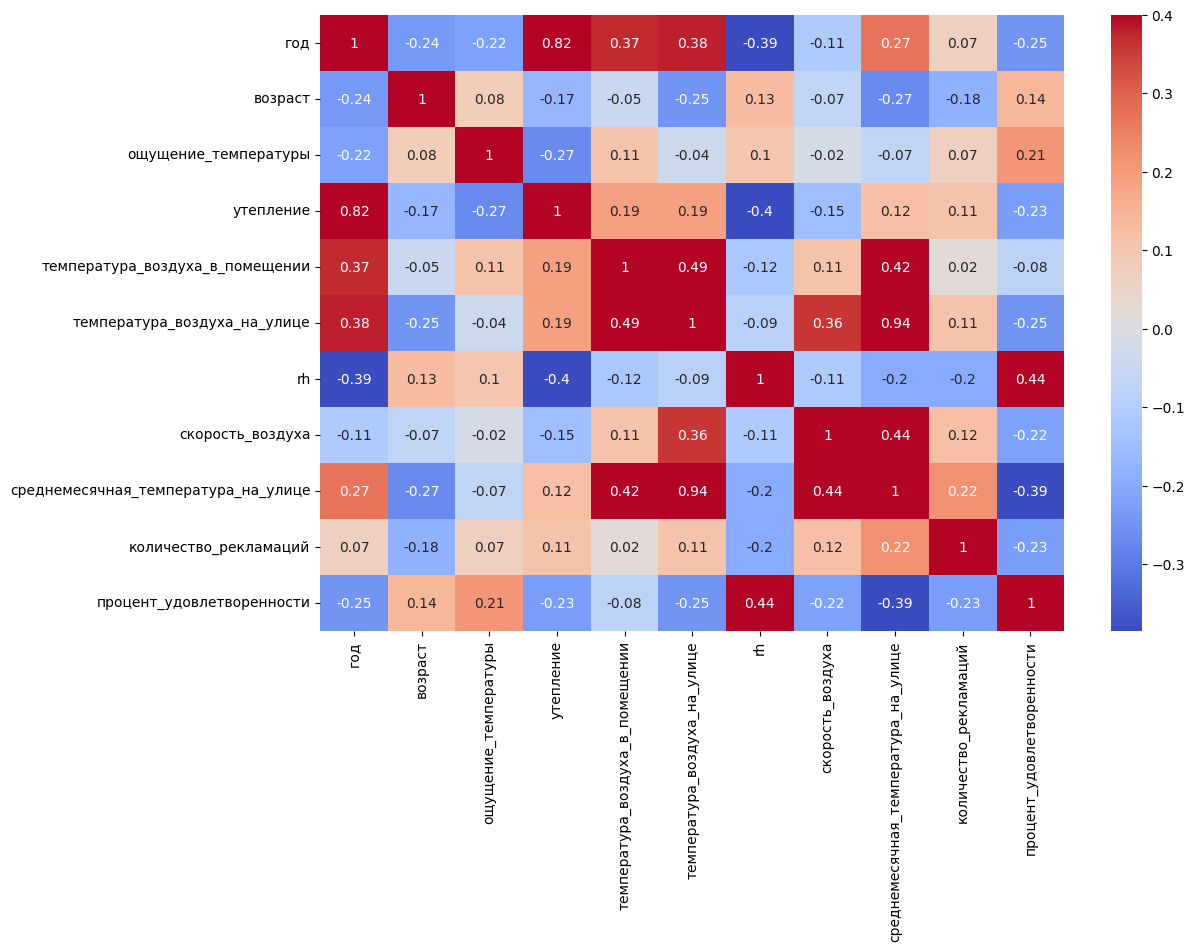

In [1028]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=round(df[get_numeric(df)].corr(method='spearman'), 2), annot=True, cmap='coolwarm', vmin=0.4, vmax=-0.35)
plt.show()

Также можно обратить внимание на корреляцию процент_удовлетворенности-среднемесячная_температура_на_улице (-0.39)

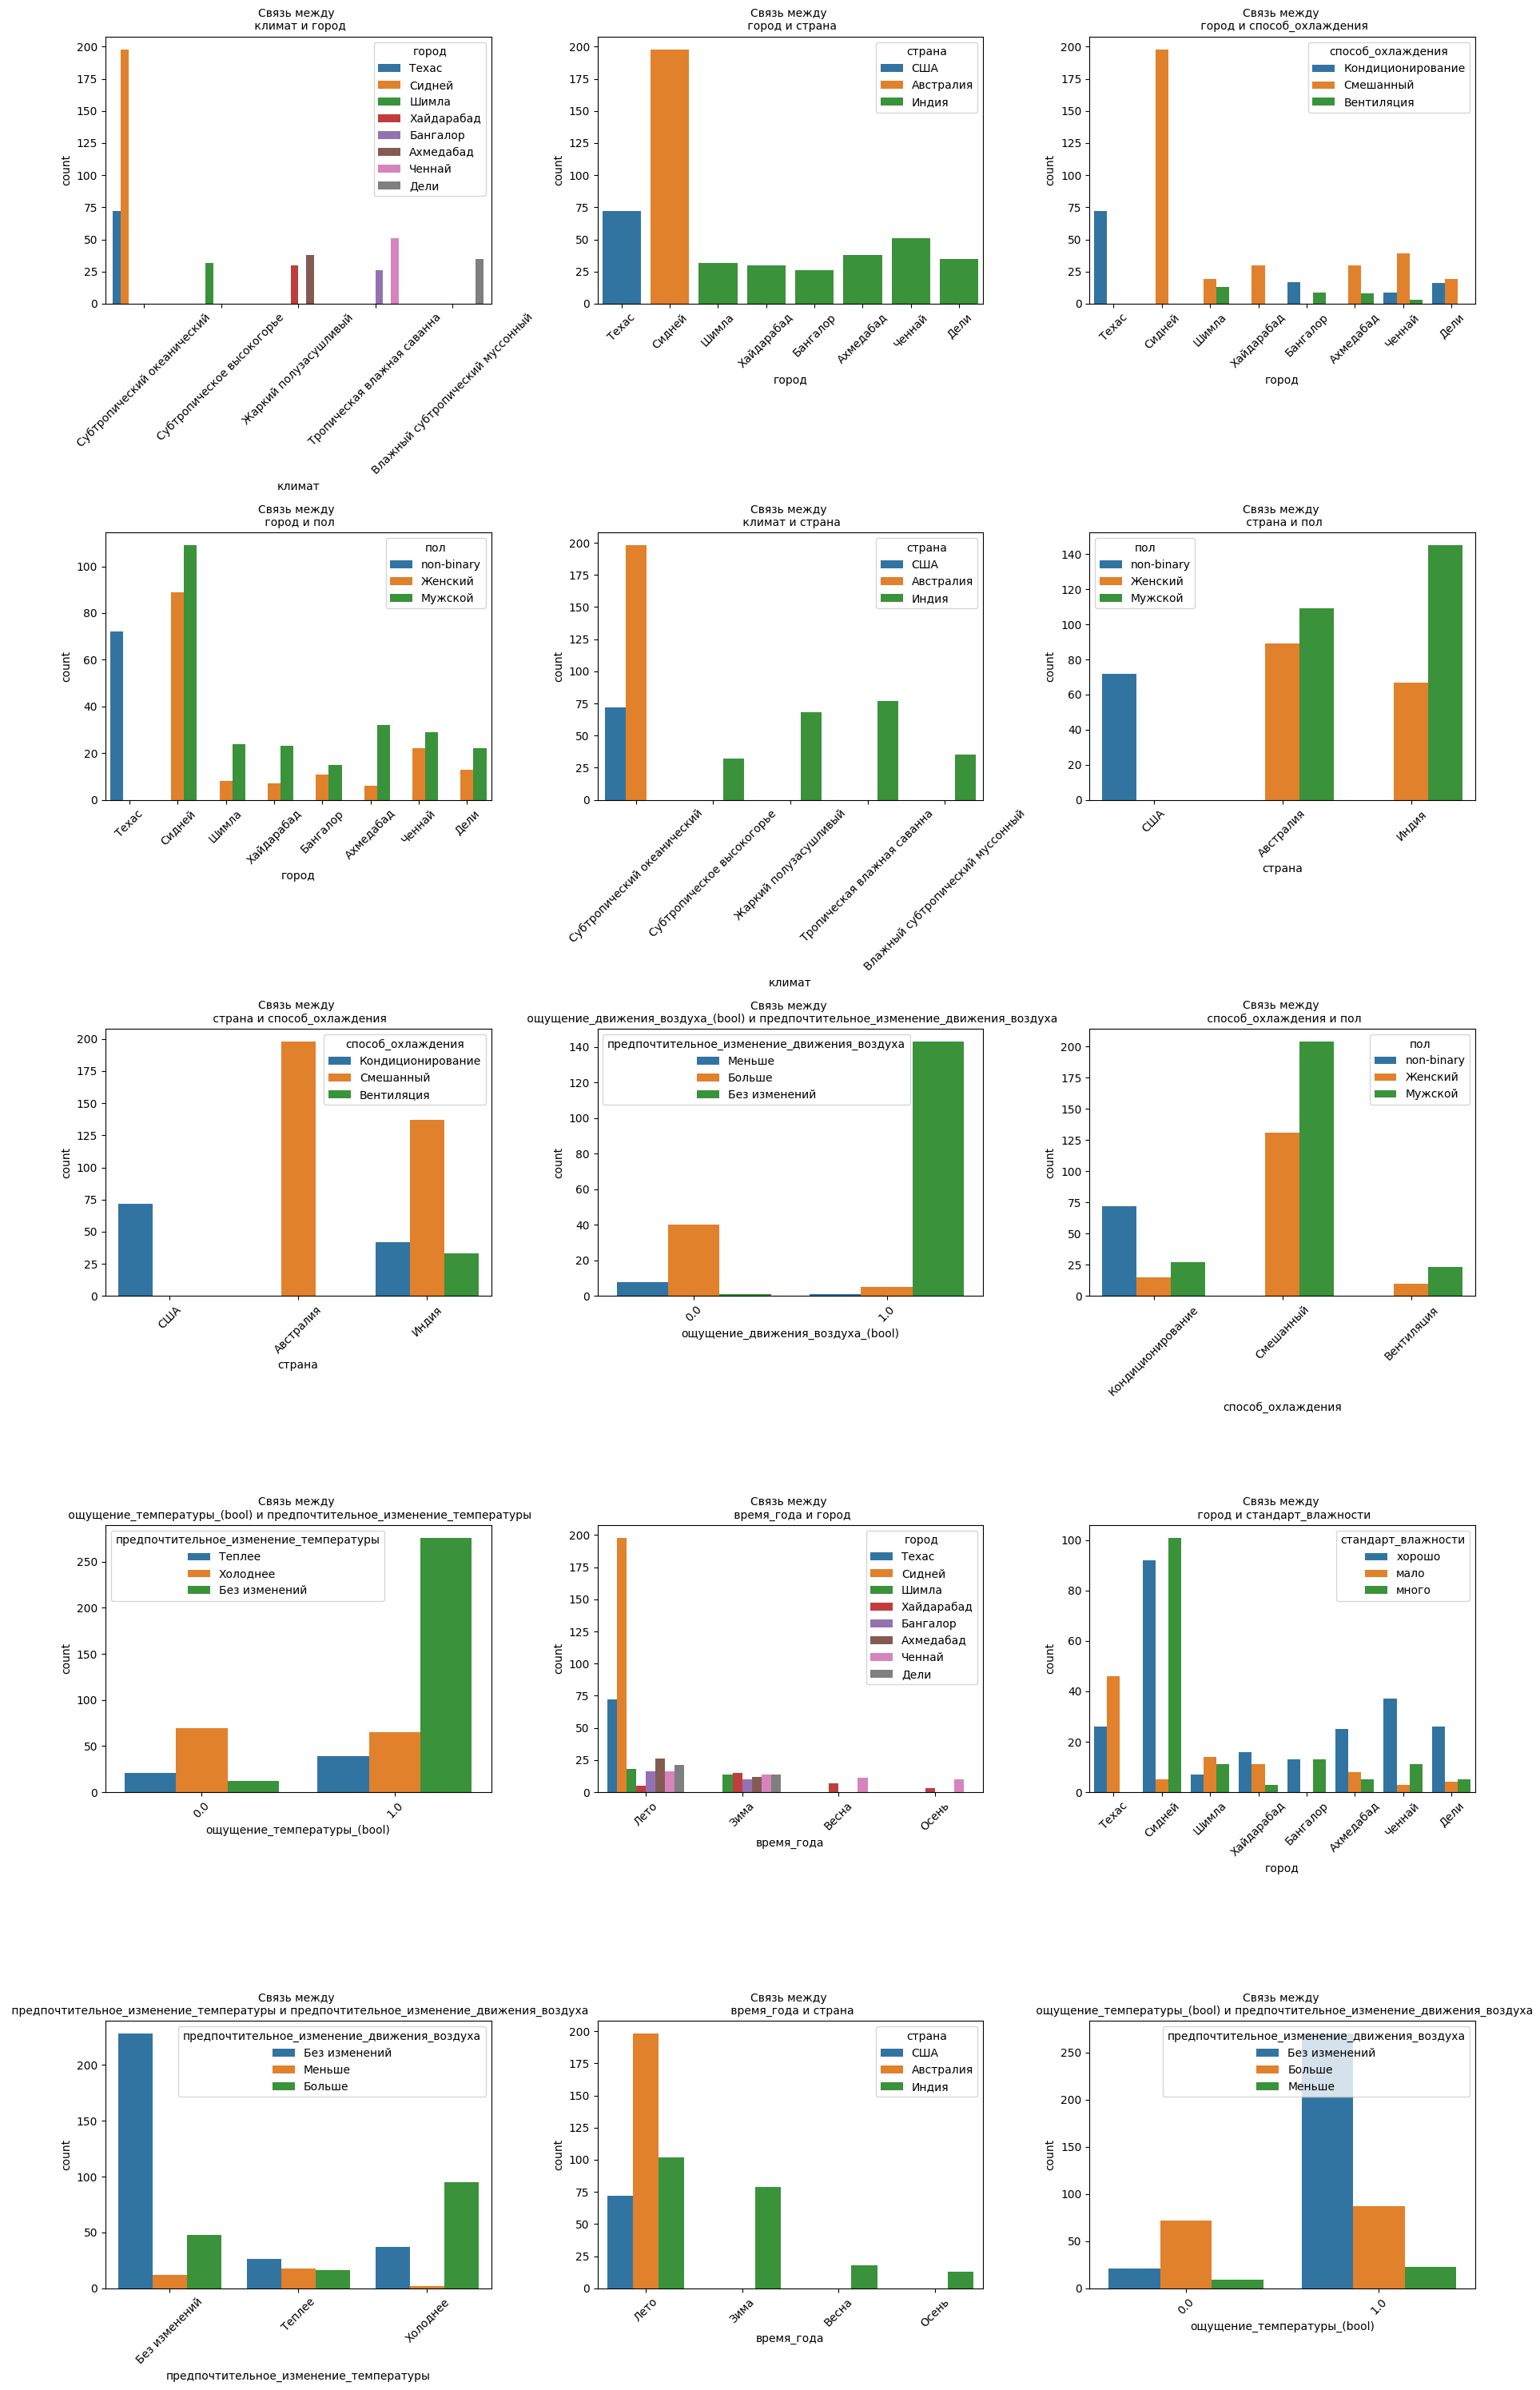

In [1029]:
fig, ax = plt.subplots(5, 3, figsize=(18, 30))
for i, (index, row) in enumerate(correlation_df.loc[correlation_df['correlation_type'] == 'categorical', ['factor_1', 'factor_2']].iterrows()):
    factor1, factor2 = row['factor_1'], row['factor_2']
    sns.countplot(df, x=factor1, hue=factor2, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].tick_params(axis='x', labelrotation=45)
    ax[i // 3, i % 3].set_title(f'Связь между \n {factor1} и {factor2}', fontsize=10)

plt.tight_layout()

## Выводы по корреляциям
Мы видим, что p_value, округленное до 4 знака после запятой во всех парах факторов, равна 0, значит у нас есть основания отрицать нулевую гипотезу и мы можем полагать, что связь во всех парах факторов статистически значима.

### 1
Очевидно, что корреляции климат-город, город-страна равны 1, так как для одного города существует только один климат и один город принадлежит только одной стране. Почти та же ситуация с климат-страна(0.71), это просто особенность данных.

### 2
Между годом сбора информации и утеплением респондентов есть очень сильная положительная связь(0.82). Это может говорить нам о том, что с каждым годом в среднем люди начали теплее одеваться. Но это, скорее, особенность данных, так как возможно в 2010 году большинство опросов проводилось летом, в то время как в остальные годы брались в расчет более холодные времена года, такие как весна, осень или зима

In [1030]:
for group_value in df['год'].unique():
    print(group_value, '\n', df.loc[df['год'] == group_value, 'время_года'].value_counts(), '\n')

2011 
 время_года
Лето    72
Name: count, dtype: int64 

2010 
 время_года
Лето    198
Name: count, dtype: int64 

2012 
 время_года
Лето     102
Зима      79
Весна     18
Осень     13
Name: count, dtype: int64 



Что и требовалось доказать, в 2010 году было около 200 респондентов летом, в 2011 году тоже летом, но намного меньше, а в 2012 году было разнообразие времен года, поэтому складывалось ощущение, что утепленность так связана с годом.

### 3
Существует умеренная связь между городом и способом охлаждения(0.72), примерно такая же связь между страной и способом охлаждения(0.60).

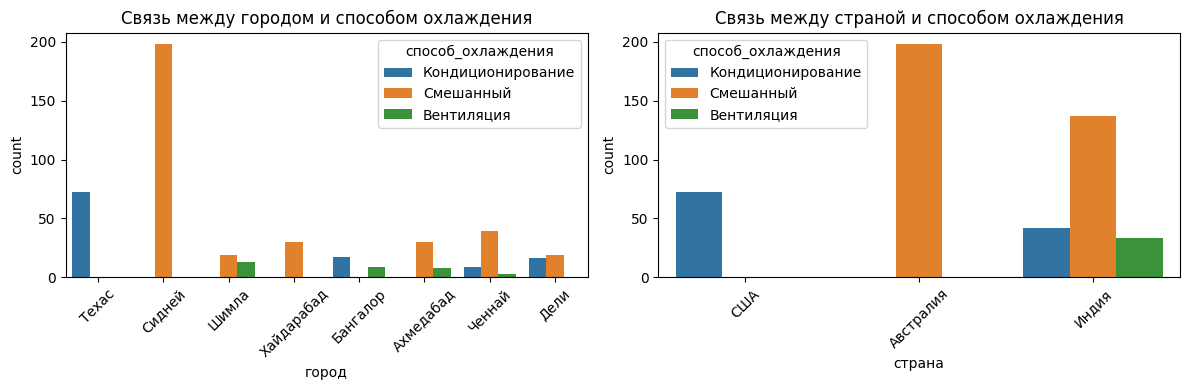

In [1031]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='город', hue='способ_охлаждения', ax=ax[0])
sns.countplot(data=df, x='страна', hue='способ_охлаждения', ax=ax[1])
ax[0].set_title('Связь между городом и способом охлаждения')
ax[1].set_title('Связь между страной и способом охлаждения')
# Поворачиваем названия городов и стран на 45 градусов для лучшей читабельности
for axx in ax:
    axx.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

Теперь стало понятно, что в США и в Австралии применяются только один способ охлаждения(кондиционирование и смешанный соответственно)

### 4
1. Есть связь между скоростью воздуха(ветер в помещении) и среднемесячной температурой на улице: это просто особенность данных.
2. С среднемесячной температурой на улице и процентом удовлетворенности тоже существует отрицательная умеренная корреляция(-0.39). Она нам говорит о том, что, чем теплее на улице, тем менее удовлетворены комфортом респонденты. Значит, охлаждение работает слабо.

Text(0.5, 1.0, 'Среднемесячная температура на улице по группе процент удовлетворенности')

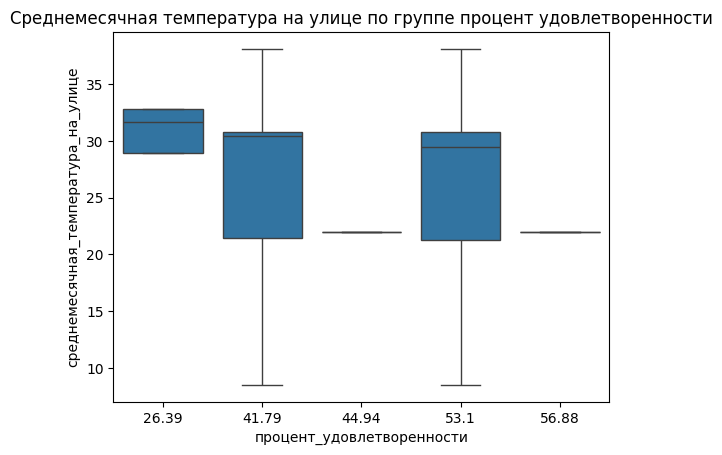

In [1032]:
sns.boxplot(data=df, x='процент_удовлетворенности', y='среднемесячная_температура_на_улице')
plt.title('Среднемесячная температура на улице по группе процент удовлетворенности')

### 5
Есть интересная положительная связь между относительной влажностью помещения и процентом удовлетворенностью респондента(0.44). Это означает, что с большей относительной влажностью, растет процент удовлетворенности респондентов. Можем сделать вывод, что стоит обратить внимание на относительную влажность при определенном типе охлаждения, перераспределять предпочтения на тот способ охлаждения, который выдает большую относительную влажность в помещении.

Text(0.5, 1.0, 'Относительная влажность по группе процент удовлетворенности')

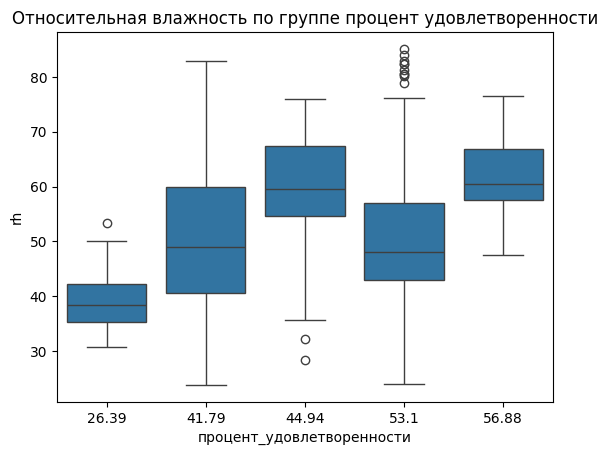

In [1033]:
sns.boxplot(data=df, x='процент_удовлетворенности', y='rh')
plt.title('Относительная влажность по группе процент удовлетворенности')

### 6
Положительная умеренная корреляция [ощущение движения воздуха(bool)-предпочтительное_изменение_движения_воздуха] и [ощущение температуры (bool)-предпочтительное_изменение_температуры] это особенность данных, мы никаких выводов по способам охлаждения по связям этих факторов дать не можем


# 4. Проверка гипотез

In [1034]:
normality_dict

{'год': False,
 'возраст': False,
 'ощущение_температуры': False,
 'утепление': False,
 'температура_воздуха_в_помещении': False,
 'температура_воздуха_на_улице': False,
 'rh': False,
 'скорость_воздуха': False,
 'среднемесячная_температура_на_улице': False,
 'количество_рекламаций': False}

Так как все количественные шкалы распределены ненормально, везде будет использоваться тест Манна Уитни или Краскела Уоллеса.

In [1035]:
def get_stat_p_val(data, categorical, numerical):
    """
    Функция get_p_val возвращает p_value связи между количественным и категориальным фактором.
    Используем метод Манна-Уитни, если категориальная шкала двухуровневая.
    Используем метод Краскела-Уоллеса, если категориальная шкала имеет больше двух уровней.
    """
    data[numerical] = pd.to_numeric(data[numerical], errors='coerce')
    groups = get_groups(data, categorical, numerical)
    statistic, p_value = 0, 1
    if len(groups) == 2:
        # если двухуровневый, то Манна-Уитни
        statistic, p_value = mannwhitneyu(*groups)
    elif len(groups) > 2:
        # если более двух уровней, то Краскела Уоллеса
        statistic, p_value = kruskal(*groups)
    return f'statistic={round(statistic, 2)} p_value={p_value}'


def plevel_chi2(data, col1, col2):
    """
    Функция plevel_chi2 возвращает p_value связи между категориальным фактором и категориальным фактором.
    Если возникает ошибка из-за пустых строк, возвращаем p_value=1
    """
    try:
        contingency_table = pd.crosstab(data[col1], data[col2])
        statistic, p_value, _, _ = chi2_contingency(contingency_table)
    except Exception:
        statistic, p_value = 0, 1
    return f'statistic={round(statistic, 2)} p_value={p_value}'


def get_groups(data, col1, col2):
    """Функция get_groups возвращает список сгруппированных по первому фактору(col1) значения второго фактора(col2)"""
    unique_values = data[col1].dropna().unique()
    groups = [data.loc[data[col1] == group, col2] for group in unique_values]
    return groups

def print_stats(data, col1, col2):
    print(f'Тип данных первого фактора: {data[col1].dtype}\nТип данных второго фактора: {data[col2].dtype}\n')
    if col1 not in get_numeric(data) and col2 not in get_numeric(data):
        print(f'У первого фактора уровней: {len(data[col1].unique())}\nУ второго фактора уровней: {len(data[col2].unique())}')



Первым делом, давайте посмотрим, сколько респондентов не дали оценку комфорта

In [1036]:
print(f"Количество не давших оценку комфорта респондентов={df['оценка_комфорта'].isna().sum()}, Процентаж={round(df['оценка_комфорта'].isna().sum() / len(df) * 100, 2)}%")

Количество не давших оценку комфорта респондентов=267, Процентаж=55.39%


Из-за такого большого количества пропусков в факторе оценка комфорта я предлагаю сегментировать респондентов и брать в расчет только тех, кто давал оценку комфорта.

In [1037]:
df2 = df[-df['оценка_комфорта'].isna()]
df2.head(5)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций,кат_рекламаций,возрастная_группа,процент_удовлетворенности,стандарт_влажности
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22,non-binary,...,1.0,NaN,NaN,NaN,28.9,0,мало,молодой возраст,26.39,хорошо
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40,non-binary,...,0.0,NaN,NaN,NaN,31.7,0,мало,молодой возраст,26.39,мало
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42,non-binary,...,0.0,NaN,NaN,NaN,32.8,0,мало,молодой возраст,26.39,мало
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27,non-binary,...,1.0,NaN,NaN,NaN,28.9,1,мало,молодой возраст,26.39,хорошо
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46,non-binary,...,1.0,NaN,NaN,NaN,32.8,0,мало,средний возраст,26.39,мало


###Влияет ли способ охлаждения на оценку комфорта?


---



In [1038]:
print_stats(df2, 'способ_охлаждения', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Нулевая гипотеза H0: категориальные переменные способ охлаждения и оценка комфорта независимы.
* Альтернативная гипотеза H1: категориальные переменные способ охлаждения и оценка комфорта имеют связь


Так как оба фактора категориальные, выбираем метод хи квадрат для нахождения p_value

In [1039]:
plevel_chi2(df2, "способ_охлаждения", "оценка_комфорта")

'statistic=30.32 p_value=0.3481673969162561'

<Axes: xlabel='способ_охлаждения', ylabel='count'>

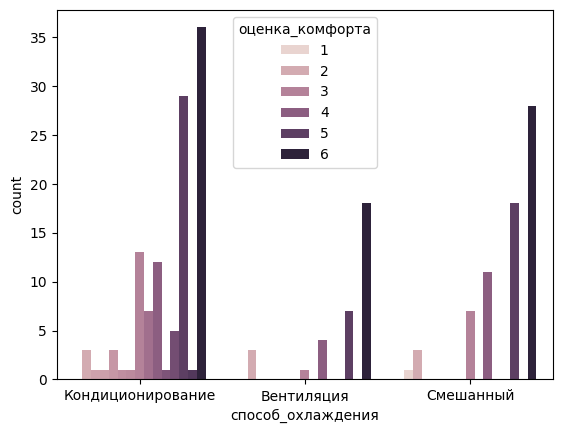

In [1040]:
sns.countplot(data=df2, x='способ_охлаждения', hue='оценка_комфорта')

По значению p_value(0.3482 > 0.05), который мы получили методом хи квадрат, мы принимаем нулевую гипотезу о том, что категориальные переменные способ охлаждения и оценка комфорта независимы.

###Влияет ли пол на оценку комфорта?

---



In [1041]:
print_stats(df2, 'пол', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Нулевая гипотеза H0: категориальные переменные пол и оценка комфорта независимы.
* Альтернативная гипотеза H1: категориальные переменные пол и оценка комфорта имеют связь


Тут тоже пол и оценка комфорта являются категориальными факторами, поэтому используем метод хи-квадрат

In [1042]:
plevel_chi2(df2, "пол", "оценка_комфорта")

'statistic=63.8 p_value=0.00013016765958073193'

<Axes: xlabel='пол', ylabel='count'>

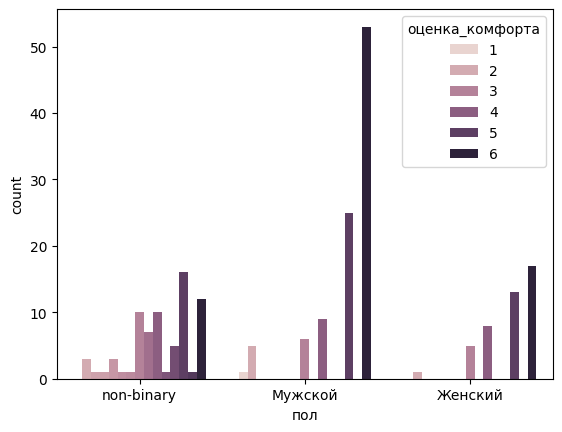

In [1043]:
sns.countplot(df2, x='пол', hue='оценка_комфорта')

По значению p_value(10^-4 < 0.05), который мы получили методом хи квадрат, мы отвергаем нулевую гипотезу о том, что категориальные переменные пол и оценка комфорта независимы. Они зависимы, причем Мужской пол с огромным преимуществом больше всех проголосовал за 6/6 оценка комфорта.

### Влияет ли возрастная группа на оценку комфорта?


---



In [1044]:
print_stats(df2, 'возрастная_группа', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Нулевая гипотеза H0: категориальные переменные возрастная группа и оценка комфорта независимы.
* Альтернативная гипотеза H1: категориальные переменные возрастная группа и оценка комфорта имеют связь


Тут тоже возрастная группа и оценка комфорта являются категориальными факторами, поэтому используем метод хи-квадрат

In [1045]:
plevel_chi2(df2, "возрастная_группа", "оценка_комфорта")

'statistic=30.74 p_value=0.32870686581672814'

<Axes: xlabel='возрастная_группа', ylabel='count'>

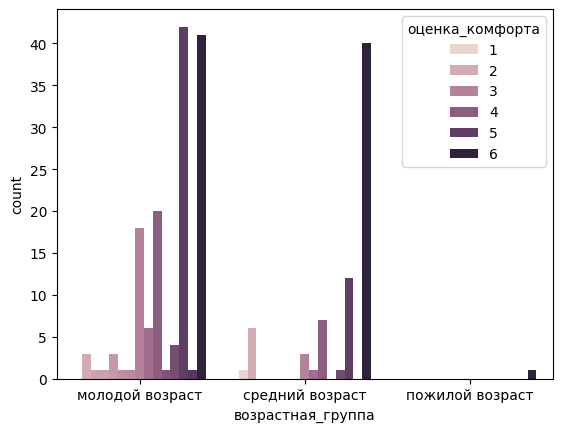

In [1046]:
sns.countplot(df2, x='возрастная_группа', hue='оценка_комфорта')

По значению p_value(0.3287 > 0.05), который мы получили методом хи квадрат, мы принимаем нулевую гипотезу о том, что категориальные переменные возрастная группа и оценка комфорта независимы. p_value > 0.05 говорит о том, что не хватает данных, чтобы опровергнуть нулевую гипотезу.

### Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?


---



In [1047]:
print_stats(df2, 'количество_рекламаций', 'оценка_комфорта')
print(f'Количество уровней: {len(df2["оценка_комфорта"].unique())}')

Тип данных первого фактора: int64
Тип данных второго фактора: object

Количество уровней: 15


* Нулевая гипотеза H0: категориальная переменные возрастная группа и оценка комфорта независимы.
* Альтернативная гипотеза H1: категориальные переменные возрастная группа и оценка комфорта имеют связь

Так как количество рекламаций количественный фактор, а оценка комфорта - категориальный, воспользуемся созданной функцией get_p_val. Количество уровней у оценки комфорта 15 > 2, поэтому пользуемся методом краскела уоллеса

In [1048]:
get_stat_p_val(df2, numerical='количество_рекламаций', categorical='оценка_комфорта')

'statistic=144.21 p_value=1.0293741672801844e-23'

По значению p_value(10^(-23) < 0.05), который мы получили методом Краскела-Уоллеса, мы отвергаем нулевую гипотезу о том, что количественный фактор количество рекламаций и категориальный фактор оценка комфорта независимы. Между ними есть связь. А так как значение statistic=144, связь значимая.

### Проверить гипотезу о том, что средняя оценка комфорта отличается в зависимости от страны

In [1049]:
print_stats(df2, 'страна', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 2
У второго фактора уровней: 15


* H0: Средние значения оценки комфорта не различаются по странам.
* H1: Средние значения оценки комфорта различаются по странам

Так как наш вопрос формулируется, как отличается ли средняя оценка комфорта, поэтому берем оценку комфорта как количественную шкалу.


---
Давайте исследовать, почему в факторе страна два уровня в нашем сегменте респондентов


In [1050]:
print(df.groupby(['страна'])[['оценка_комфорта']].mean(), '\n\n', df2.groupby(['страна'])[['оценка_комфорта']].mean())

          оценка_комфорта
страна                   
Австралия             NaN
Индия            5.062937
США              4.194444 

        оценка_комфорта
страна                
Индия         5.062937
США           4.194444


Можем заметить, что в нашем сегменте респондентов нет страны Австралия, так как ни один респондент из Австралии не дал оценку комфорта.

In [1051]:
get_stat_p_val(df2, numerical='оценка_комфорта', categorical='страна')

'statistic=3020.0 p_value=2.7980107480830727e-07'

По значению p_value(2*10^(-7) < 0.05), который мы получили методом Манна-Уитни(два уровня в факторе город), мы отвергаем нулевую гипотезу о том, что средние значения оценки комфорта по группам статистически различаются. Так как средние различаются, есть связь. Соответственно, именно в нашем сегменте респондентов, средняя оценка комфорта между странами США и Индия различаются. Поэтому можно утверждать, что в среднем от региона очень зависит оценка комфорта, так как еще и statistic=3020

### Проверить гипотезу о том, что среднее ощущение температуры отличается от страны

In [1052]:
print_stats(df, 'страна', 'ощущение_температуры')

Тип данных первого фактора: object
Тип данных второго фактора: float64



In [1053]:
print(df['страна'].value_counts(), '\n\n', df['страна'].value_counts().sum())

страна
Индия        212
Австралия    198
США           72
Name: count, dtype: int64 

 482


Видим, что в ощущениях комфорта точно нет пропусков, как в оценке комфорта. И ощущение температуры тоже косвенно влияет на ощущение комфорта. Поэтому думаю, что эта гипотеза более точно позволит нам сделать вывод

* H0: Средние значения ощущения температуры не различаются по странам.
* H1: Средние значения ощущения температуры различаются по странам

In [1054]:
get_stat_p_val(df, categorical='страна', numerical='ощущение_температуры')

'statistic=42.8 p_value=5.070744502746438e-10'

По значению p_value(5*10^(-10) < 0.05), который мы получили методом Манна-Уитни(два уровня в факторе город), мы отвергаем нулевую гипотезу о том, что средние значения ощущения температуры по группам статистически различаются. Так как средние различаются, есть связь. Можно утверждать, что в среднем от региона очень зависит ощущение комфорта, так как еще и statistic несколько десятков(42)

### Есть ли взаимосвязь между относительной влажностью и ощущением температуры?

In [1055]:
print_stats(df, 'rh', 'ощущение_температуры')

Тип данных первого фактора: float64
Тип данных второго фактора: float64



* H0: Нет связи между двумя количественными факторами
* H1: Есть связь между двумя количественными факторами

---



Так как оба фактора количественные и все количественные факторы в датасете ненормально распределены, мы используем метод спирмена

In [1056]:
statistic, p_value = spearmanr(df['ощущение_температуры'], df['rh'])
print(round(statistic, 2), p_value)

0.1 0.02926815958305712


Так как p_value=0.03<0.05, мы можем опровергнуть нулевую гипотезу и принять альтернативную, что есть связь между относительной влажностью и ощущением температуры. Но, так как **statistiс** близок к нулю, связь очень слабая.

### Есть ли связь между скоростью воздуха и оценкой комфорта?

In [1057]:
print_stats(df2, 'оценка_комфорта', 'скорость_воздуха')

Тип данных первого фактора: float64
Тип данных второго фактора: float64



* H0: Нет связи между двумя количественными факторами
* H1: Есть связь между двумя количественными факторами

In [1058]:
statistic, p_value = spearmanr(df2['скорость_воздуха'], df2['оценка_комфорта'])
print(round(statistic, 2), p_value)

-0.29 1.5185235071053097e-05


Так как p_value=4 * 10^(-6) <0.05, мы можем опровергнуть нулевую гипотезу и принять альтернативную, что есть связь между скоростью воздуха и ощущением температуры. Но, так как абсолютная величина **statistiс** в пределах 0.2-0.4, связь слабая.

# Регрессионнная модель

In [1063]:
features=['климат', 'город', 'способ_охлаждения', 'возраст',
       'ощущение_температуры',
       'предпочтительное_изменение_температуры',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'занавески',
       'среднемесячная_температура_на_улице', 'количество_рекламаций', 'возрастная_группа']
categorical_features= [x for x in features if x not in get_numeric(df)]

Подберём факторы, которые потенциально могут влиять на температуру в помещении. Заметим, что фактор 'страна' излишен, так как есть фактор 'город' -- более точная характеристика. Перебрав факторы, удаляем те, которые не влияют на результат регресии.

In [1064]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[['температура_воздуха_в_помещении']], test_size=0.15, random_state=42)

ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(x_train[categorical_features])

x_train = get_ohe(x_train, categorical_features)
x_test = get_ohe(x_test, categorical_features)
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
prediction = lin_regr.predict(x_test)

print(f'R2 = {round(r2_score(y_test, prediction), 2)}\nMAPE = {round(mean_absolute_percentage_error(y_test, prediction) * 100, 2)}%')

R2 = 0.23
MAPE = 9.93%


### Вывод по регрессионной модели
По итогам построенной нами модели, самый лучший результат, полученный таким образом, R = 0.25 и MAPE = 9.93%. Это означает, что целевая температура воздуха в помещении зависит от фич, которые мы выбрали, всего на 25% с ошибкой среднего значения в 9.93%. Это не самый лучший показатель для модели, модель очень слабая.
___
Чтобы улучшить модель, скорее всего, поработать над качественным сбором информации.

# ВЫВОДЫ
---


## По предобработке данных:
Удалили 2 дублирующихся строки, 2 фактора: рост, вес(3.4% всех данных). В общем было заменено 551 пропущенных значения статистикой. Это примерно 4.1% от всех собранных данных. В сумме было предобработано 7.5% данных что вполне не мало.
* Удалили факторы рост и вес, потому что эта информация не так сильно влияет на составление портрета респондента. Тем более в этих факторах было огромное количество пропусков. По этим причинам было принято решение удалить эти два фактора
* Заменили возраст благодаря модели линейной регрессии, пол в США закрыли значением "non-binary", так как с темой пола в США все сложно.

---

## По статистически значимым связям:

In [1061]:
df.groupby(['способ_охлаждения'])[['rh', 'температура_воздуха_в_помещении']].median()

,rh,температура_воздуха_в_помещении
способ_охлаждения,,
Вентиляция,46.30,25.3
Кондиционирование,42.45,24.4
Смешанный,56.50,24.6



* Есть умеренная положительная связь(0.44) между относительной влажностью в помещении и процентом удовлетворенности респондентов, что говорит нам о том, что, чем больше относительную влажность выдает способ охлаждения, тем более удовлетворены респонденты. Поэтому стоит обратить внимание на смешанный способ охлаждения - метод, при котором выдается самая максимальная относительная влажность.
* Со среднемесячной температурой на улице и процентом удовлетворенности тоже существует отрицательная умеренная корреляция(-0.39). Она нам говорит о том, что, чем теплее на улице, тем менее удовлетворены комфортом респонденты. Значит, охлаждение в плане температуры работает слабовато, поэтому нужно соблюсти баланс между относительной влажностью и низкой температурой, что опять же доказывает преимущество смешанного способа охлаждения над другими.

## По регионам:
Так как в регионе Австралия никто не дал оценку комфорта, будем отталкиваться от фактора ощущение температуры как главный показатель комфорта респондента, где -3 - холодно, 3 - жарко.

In [1062]:
df.groupby('страна')['ощущение_температуры'].mean().map(lambda x: round(x, 2))

страна
Австралия    0.49
Индия        0.12
США         -0.31
Name: ощущение_температуры, dtype: float64

* В Австралии был использован только метод смешанного охлаждения и он показал слабоватый результат среди охлаждения, респондентам было жарковато. Есть метод кондиционирования, который выдает меньшую температуру в помещении. Его можно попробовать внедрить в рынок Австралии.
* В Индии были использованы все три типа охлаждения и в целом все респондентов устраивало, судя по ощущению температуры и относительной влажности. Также стоит отметить, что тот инцидент с неисправностью способа охлаждения(29.3 градуса и ~80% относительная влажность) не должен повторяться.
* В США было прохладно и относительная влажность была на очень низком уровне(~38%), поэтому можно попробовать внедрить смешанный тип охлаждения на рынок США, так как он выдает температуру чуть выше и относительную влажность на 14% выше, чем кондиционирование.


---



## В целом:
Самой лучшей опцией вложения является смешанный способ охлаждения. Этот тип охлаждения очень хорошо себя показал на рынке Индии и Австралии, выдавая самые комфортные температуры и высокий показатель относительной влажности, а относительная влажность прямо пропорциональна оценке комфорта. Таким образом, лучшим выбором будет смешанный тип охлаждения.
* Насчет жалоб, нужно поработать над регуляторами температуры, относительной влажности в смешанном климатическом оборудовании и над регулятором скорости потока воздуха в кондиционерах, так как эти пункты, скорее всего, источники жалоб.
* В регион Австралии как раз стоит внедрить кондиционирование, так как в том регионе не хватает мощности охлаждения и там и так очень высокий уровень относительной влажности в помещениях.
* В Индии все показатели очень хорошие, поэтому, можно поработать только над отсутствием неисправностей в этом регионе.
* В США стоит внедрить смешанный тип охлаждения, чтобы увеличить относительную влажность и температуру в помещении. Благодаря смешанному типу охлаждения, этот регион имеет потенциал показать самый лучший результат среди всех регионов по оценке комфорта респондентов.